In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from aging.plotting import figure

In [2]:
def minmax(df):
    return (df - df.min()) / (df.max() - df.min())

In [2]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')

In [ ]:
# for figuring out what data might be filtered out when adding a frames occupancy filter 
# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_uuids_v11.txt', df.index.get_level_values('uuid').to_numpy(), fmt="%s")
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_mouse_v11.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet')
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_uuids_v11-1.txt', df.index.get_level_values('uuid').to_numpy(), fmt="%s")
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_mouse_v11-1.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet')
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_uuids_v11.txt', df.index.get_level_values('uuid').to_numpy(), fmt="%s")
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_mouse_v11.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet')
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_uuids_v11-1.txt', df.index.get_level_values('uuid').to_numpy(), fmt="%s")
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_mouse_v11-1.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

In [26]:
# for figuring out what data might be filtered out when adding a frames occupancy filter 
# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_raw_usage_matrix_v00.parquet')
# uuids = np.loadtxt('/n/groups/datta/win/longtogeny/data/tmp_uuids_v11.txt', dtype=str)
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_mouse_v11.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet')
uuids = np.loadtxt('/n/groups/datta/win/longtogeny/data/tmp_uuids_v11-1.txt', dtype=str)
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_mouse_v11-1.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_raw_usage_matrix_v00.parquet')
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_uuids_v11.txt', df.index.get_level_values('uuid').to_numpy(), fmt="%s")
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_mouse_v11.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

# df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet')
# uuids = np.loadtxt('/n/groups/datta/win/longtogeny/data/tmp_female_uuids_v11-1.txt', dtype=str)
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_uuids_v11-1.txt', df.index.get_level_values('uuid').to_numpy(), fmt="%s")
# np.savetxt('/n/groups/datta/win/longtogeny/data/tmp_female_mouse_v11-1.txt', df.index.get_level_values('mouse').to_numpy(), fmt="%s")

In [27]:
x = list(set(uuids) - set(df.index.get_level_values('uuid')))
x

['13a9c405-ec38-440a-a3ff-c887ea4bc3e9',
 '7b8ef82b-9f1a-48df-ab59-7a245101dbf3',
 '786ec04d-3986-4006-9022-de620b330eeb',
 '176fe951-26d6-472c-8f71-1aa5ae5fc5bd',
 '2e34b7c9-863e-4549-aff8-4d4c36a5d480',
 'f806e260-8337-4692-92c5-df8060bdefb6',
 'a3bbb65a-93ca-421b-99e0-0f63124b689d',
 '525f5fb3-1bb4-43d1-beb8-9461819b46bc',
 '17f45c64-faab-4529-879a-ec80854fe2a5',
 'e4ed7c34-bbf4-4573-9ac3-bee6b454cf5d',
 '1fbc2975-c3dc-4b5f-9f6d-5d464d22cfa0',
 '75edf002-c6e9-48c4-8252-1eba52d0af43',
 '7daf405e-f246-4233-9b97-c8ea76a3cf74',
 'e5c5d7ec-501e-4f65-be92-e5606ae4bd9f',
 'a69dfe43-7d6d-4ef7-b194-5f43ef79c0a8',
 'c050dfe8-7af8-4414-ae59-ad8d03f5edd9',
 '92c3f072-5761-44bf-b2b9-dc8caa832e3b']

In [28]:
len(x)

17

In [108]:
df = df.query('age < 100')

In [173]:
df = minmax(df)

In [174]:
df.index.get_level_values('age').nunique()

22

In [175]:
age_cuts = pd.qcut(df.index.get_level_values('age'), 9, labels=False)

In [176]:
pcs = PCA(n_components=3).fit_transform(df.astype(float))

In [177]:
pcs.shape

(351, 3)

In [178]:
pc_df = pd.DataFrame(pcs, index=df.index)

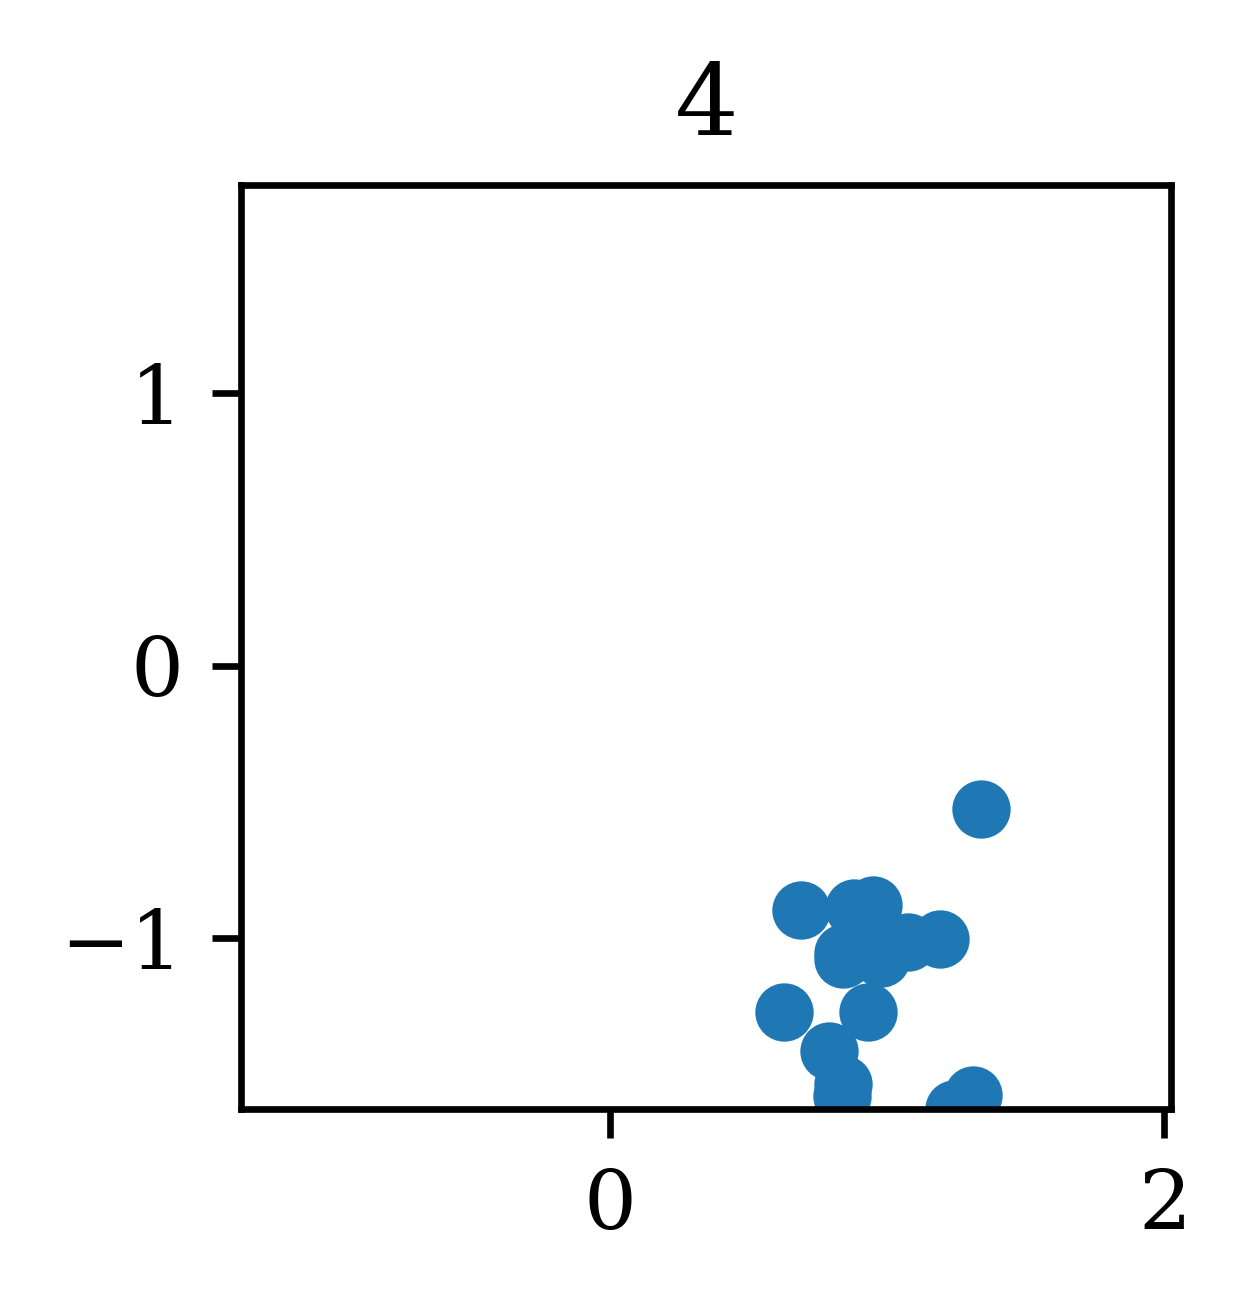

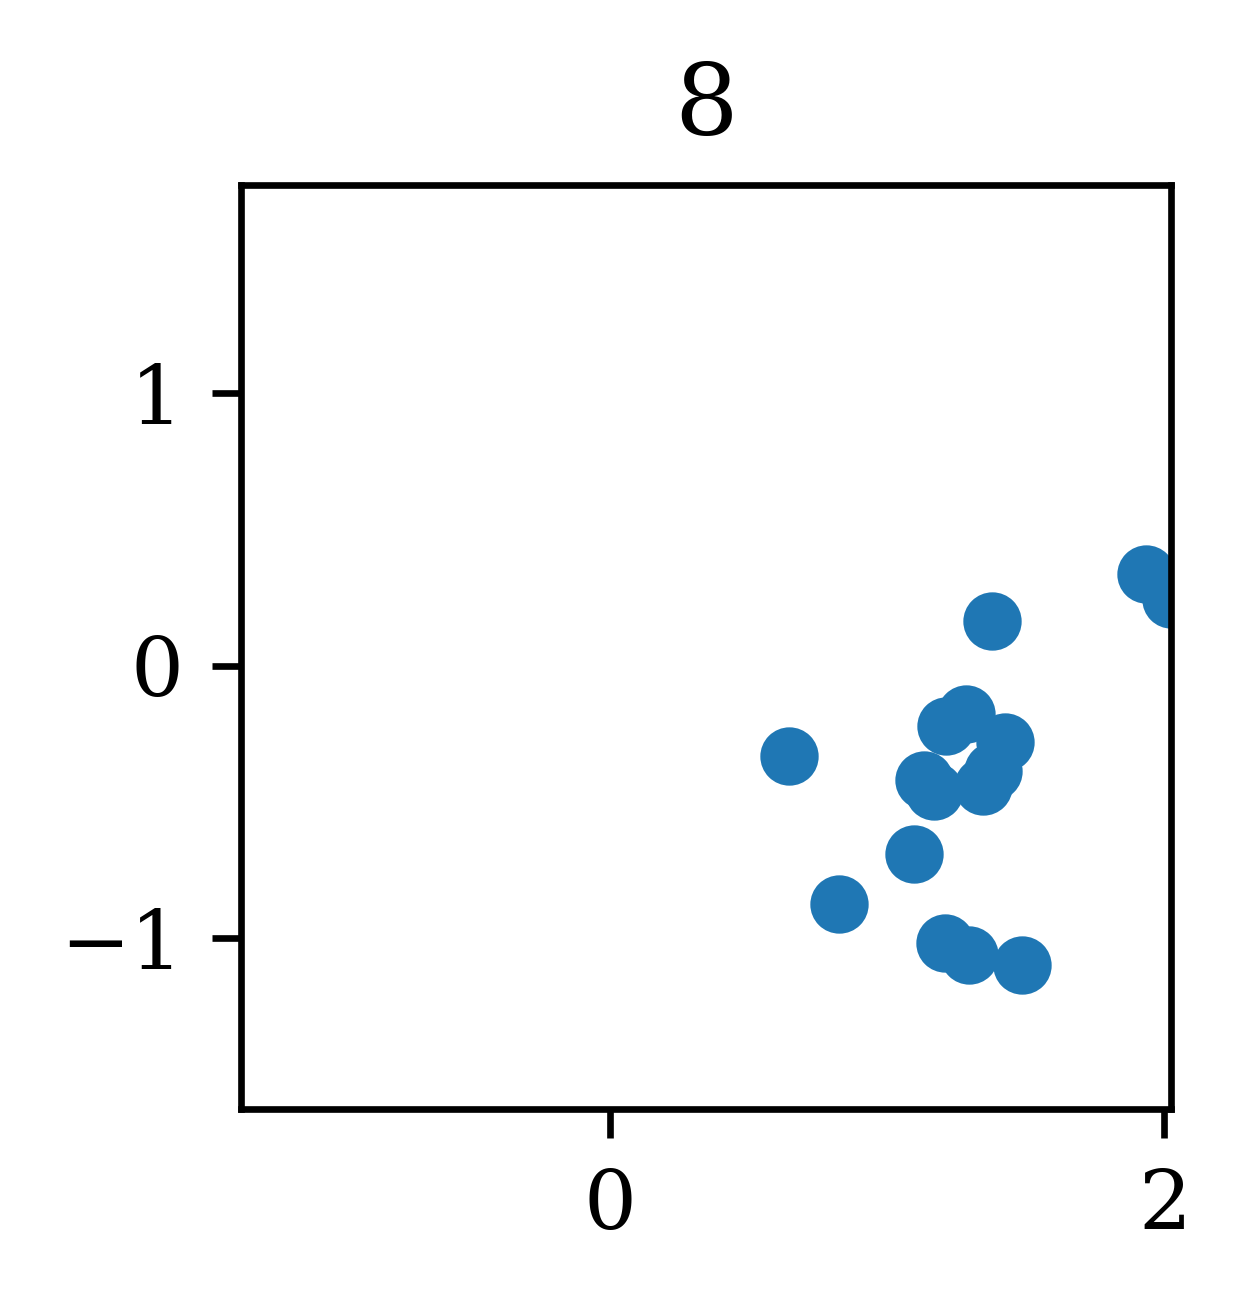

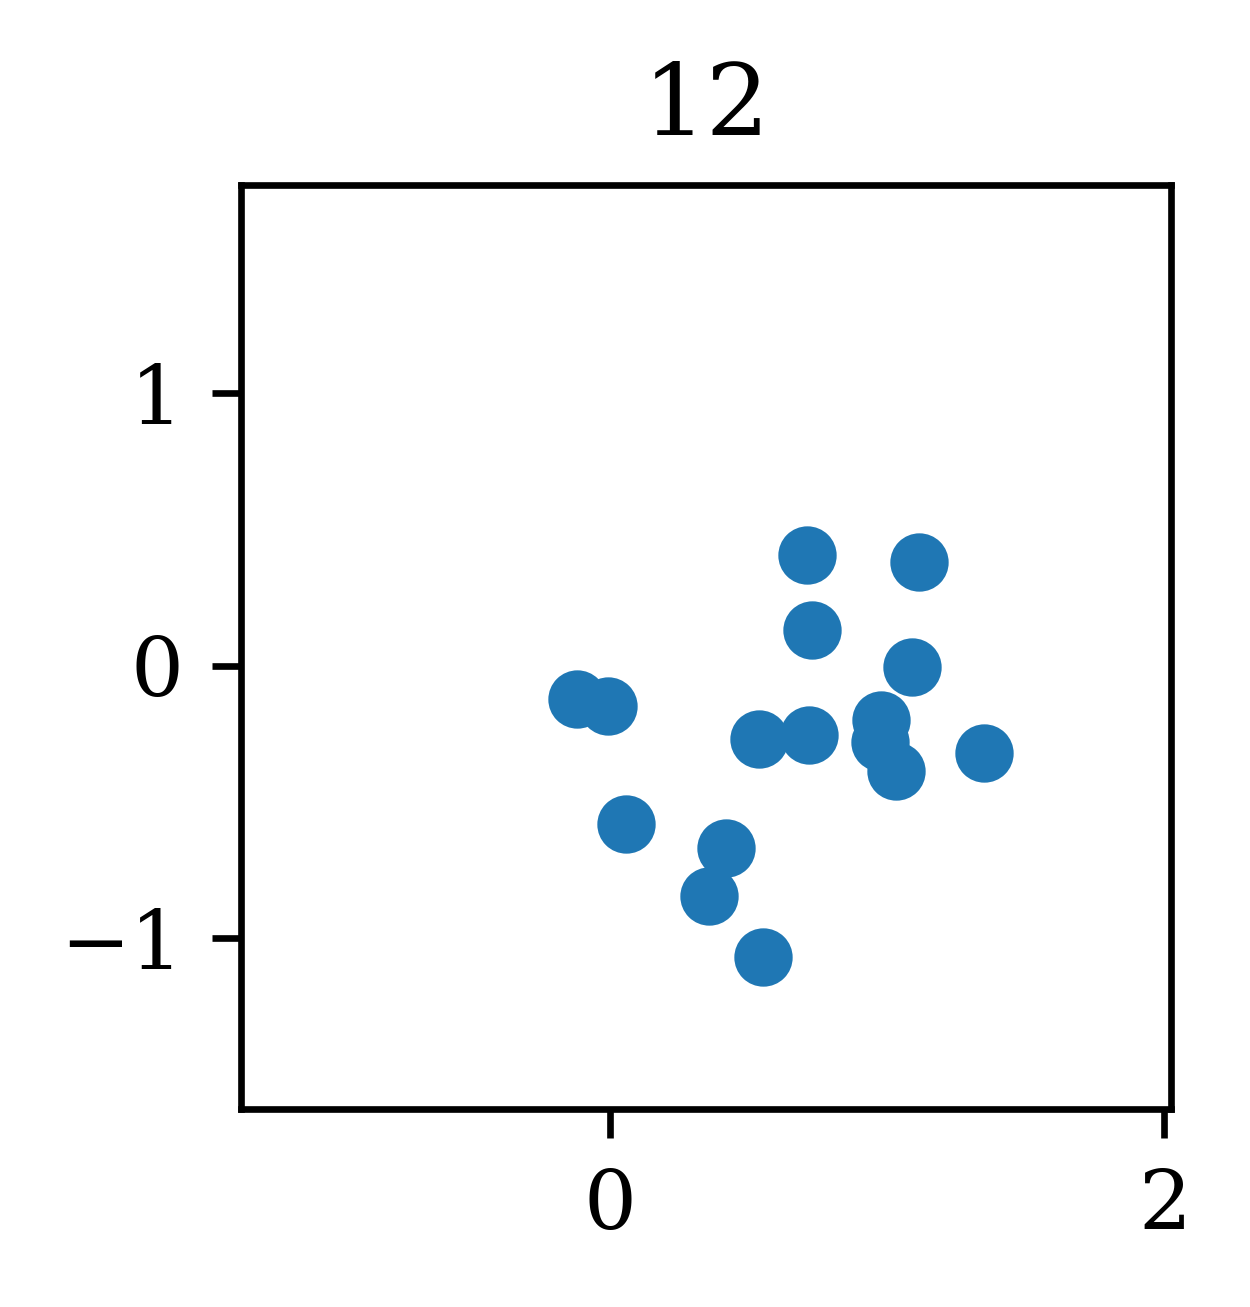

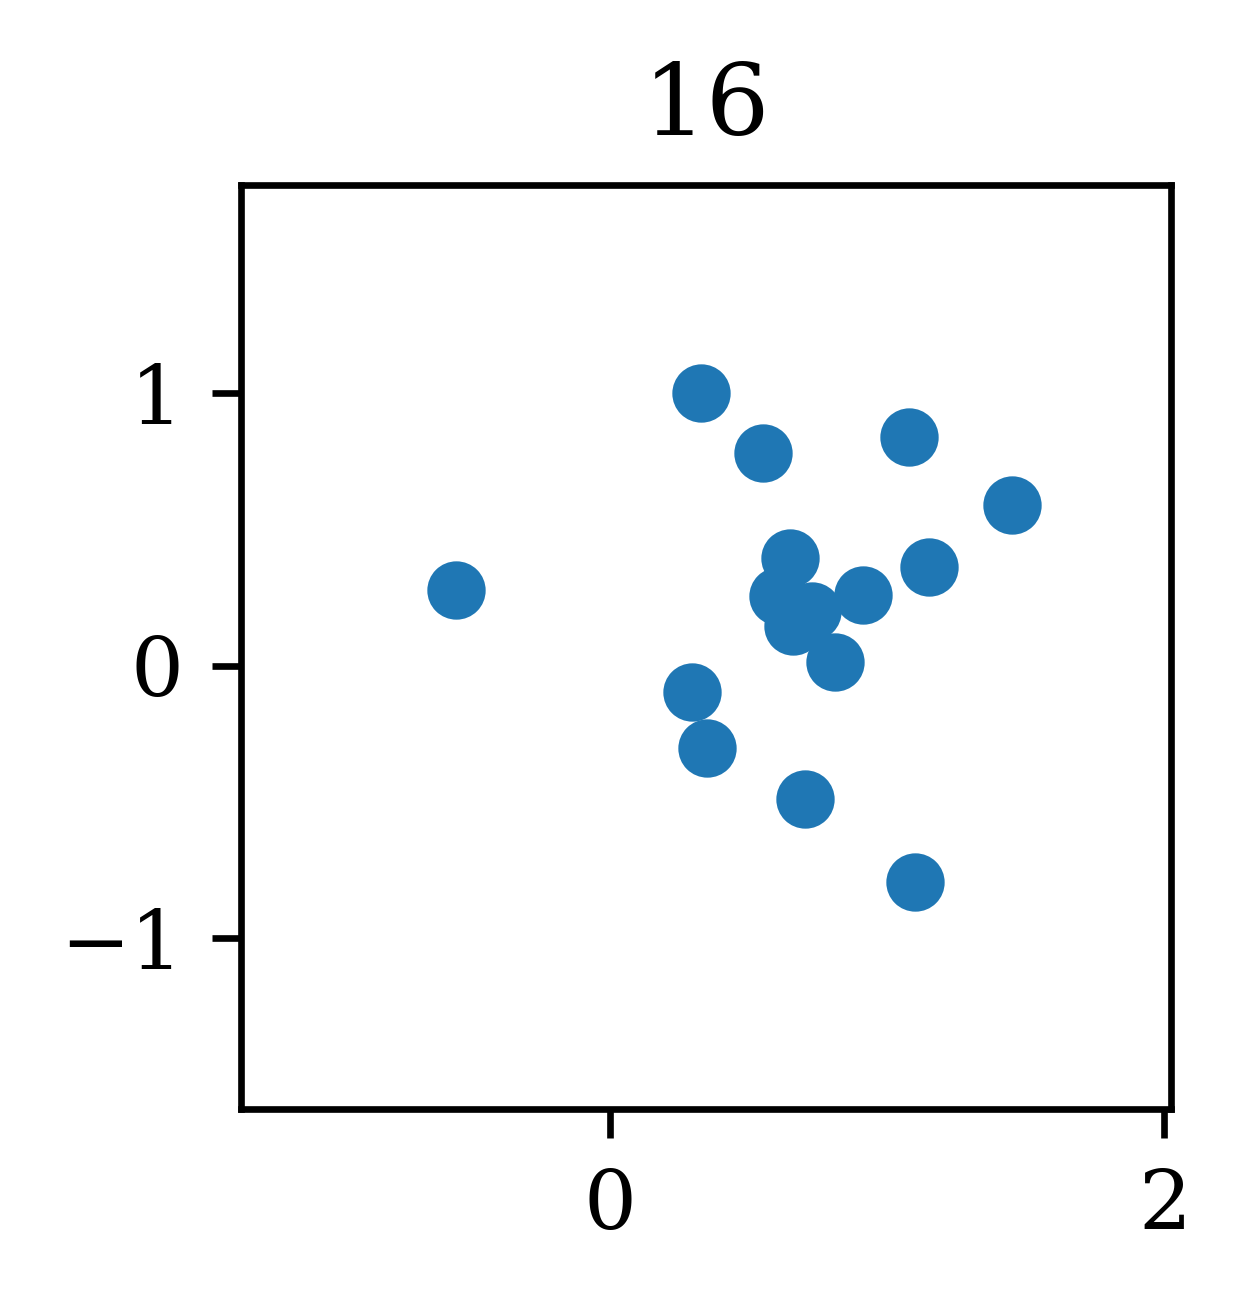

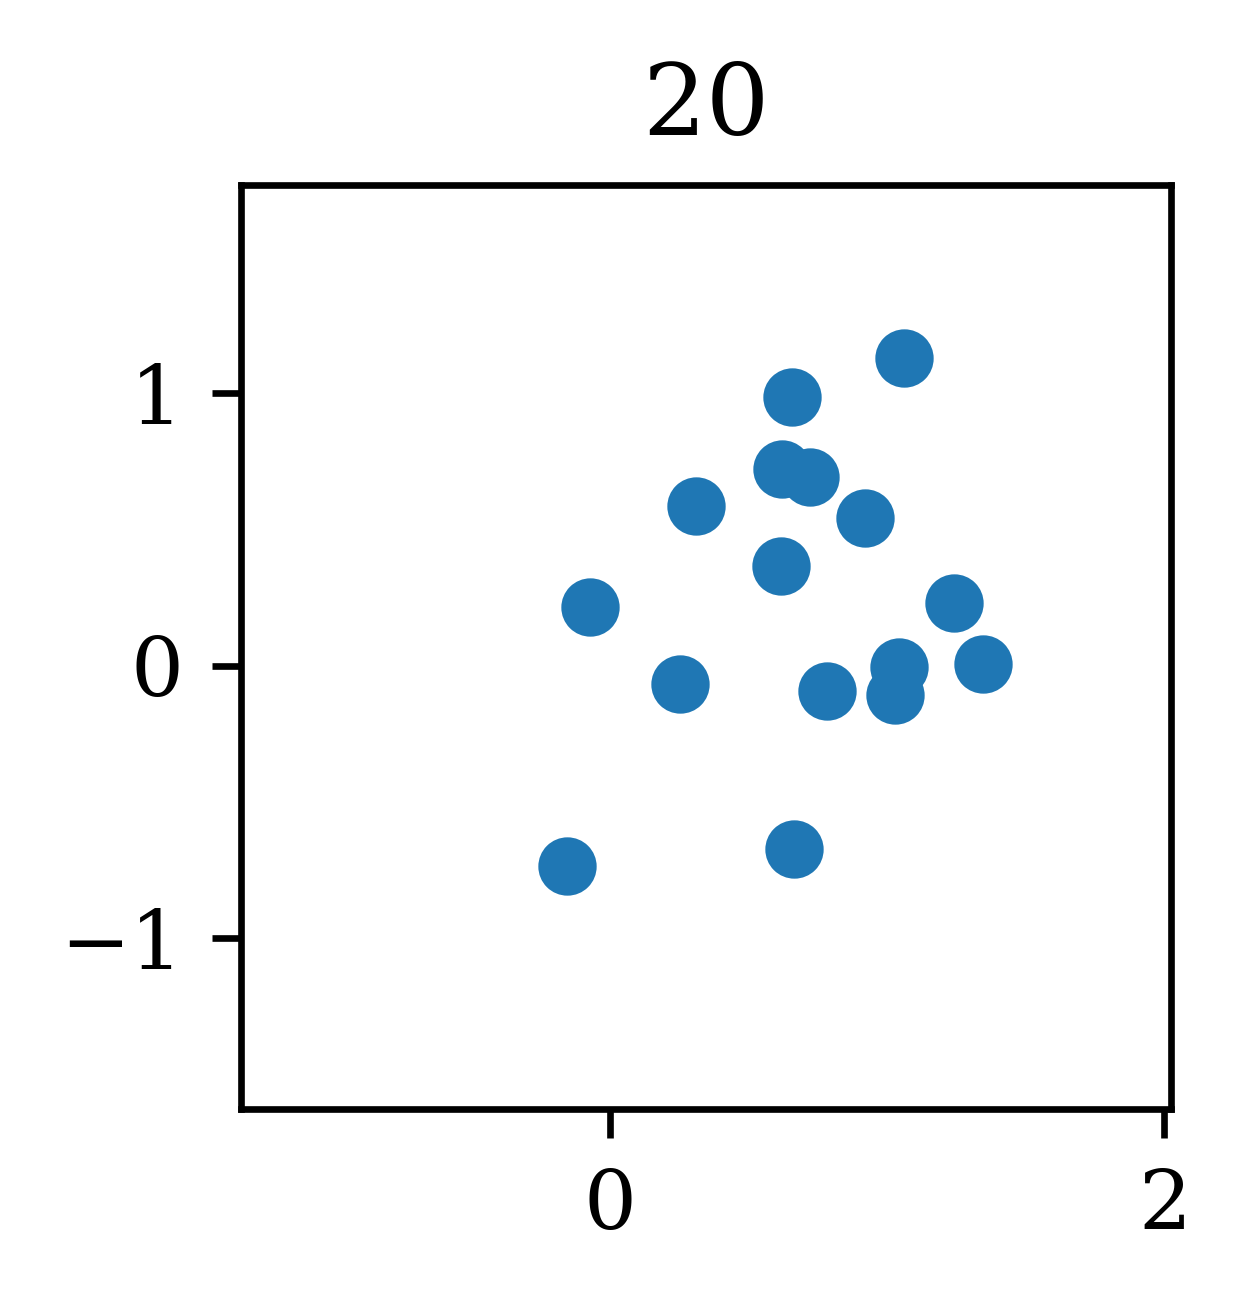

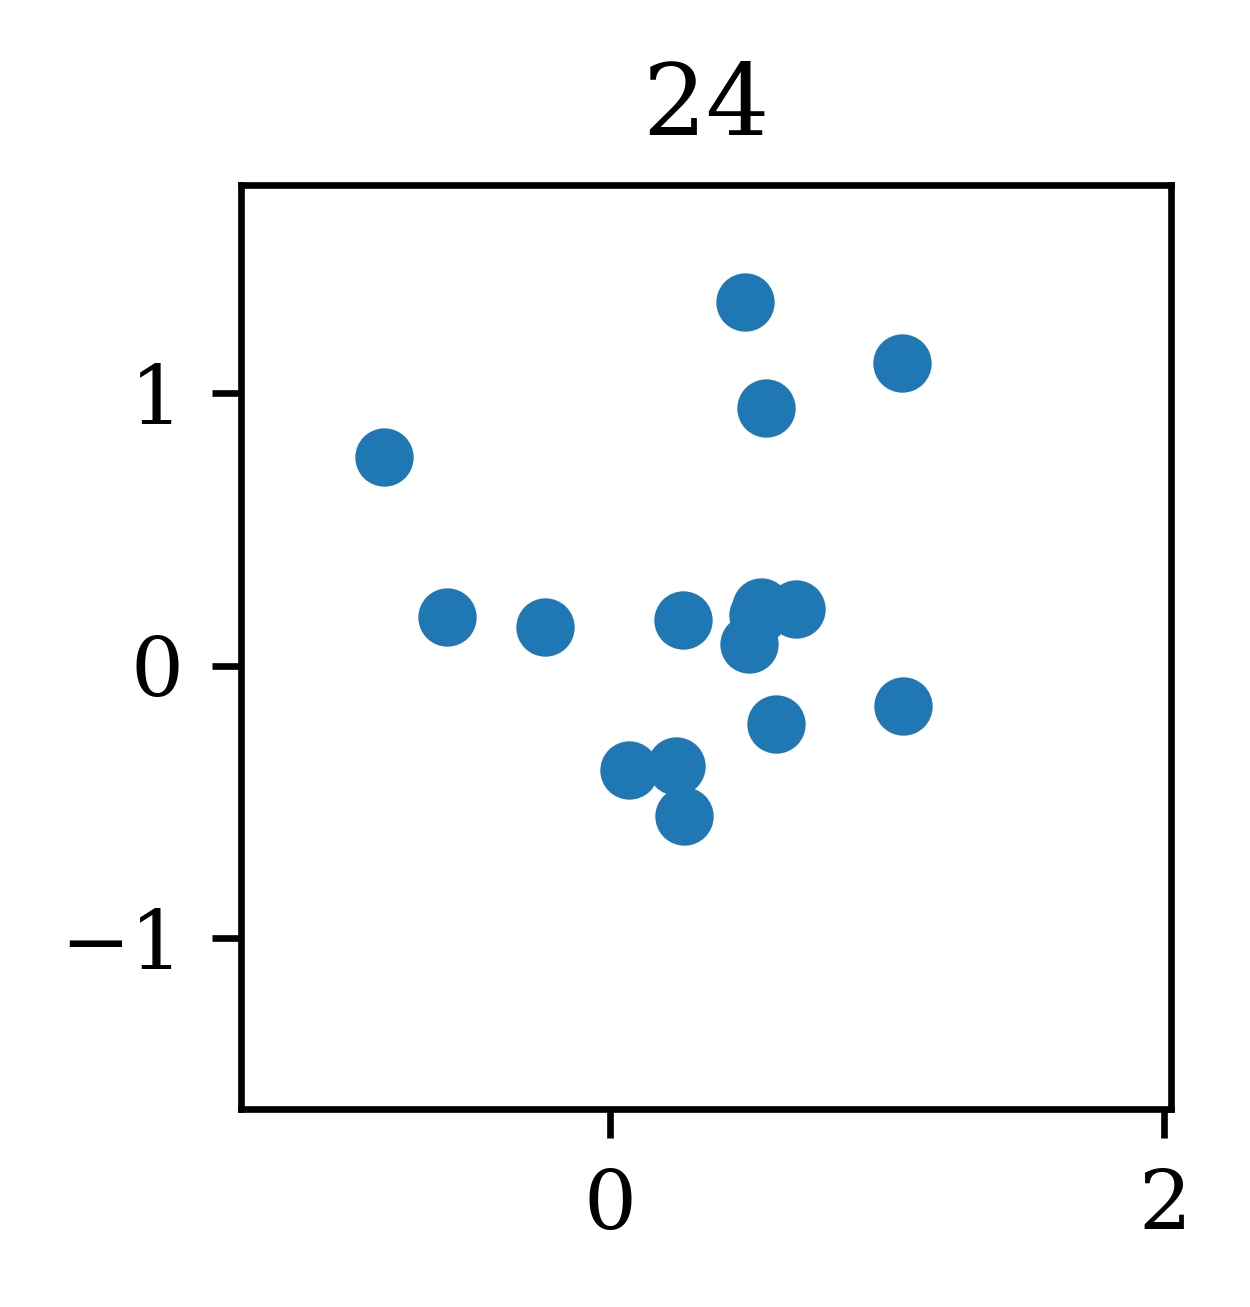

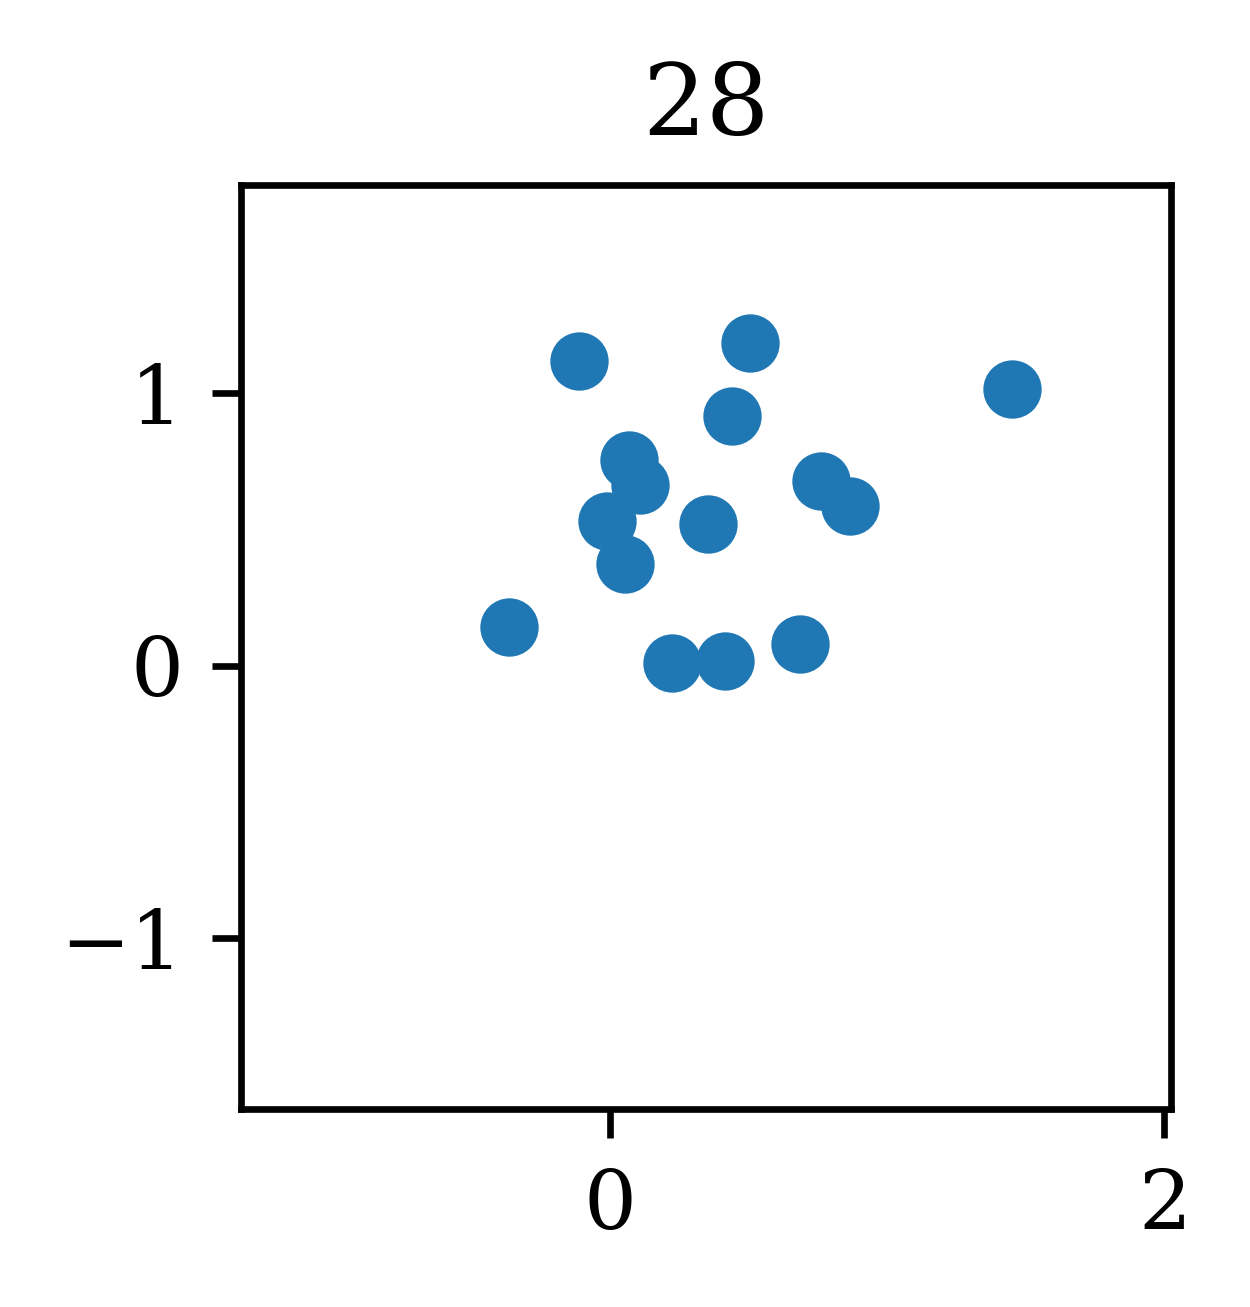

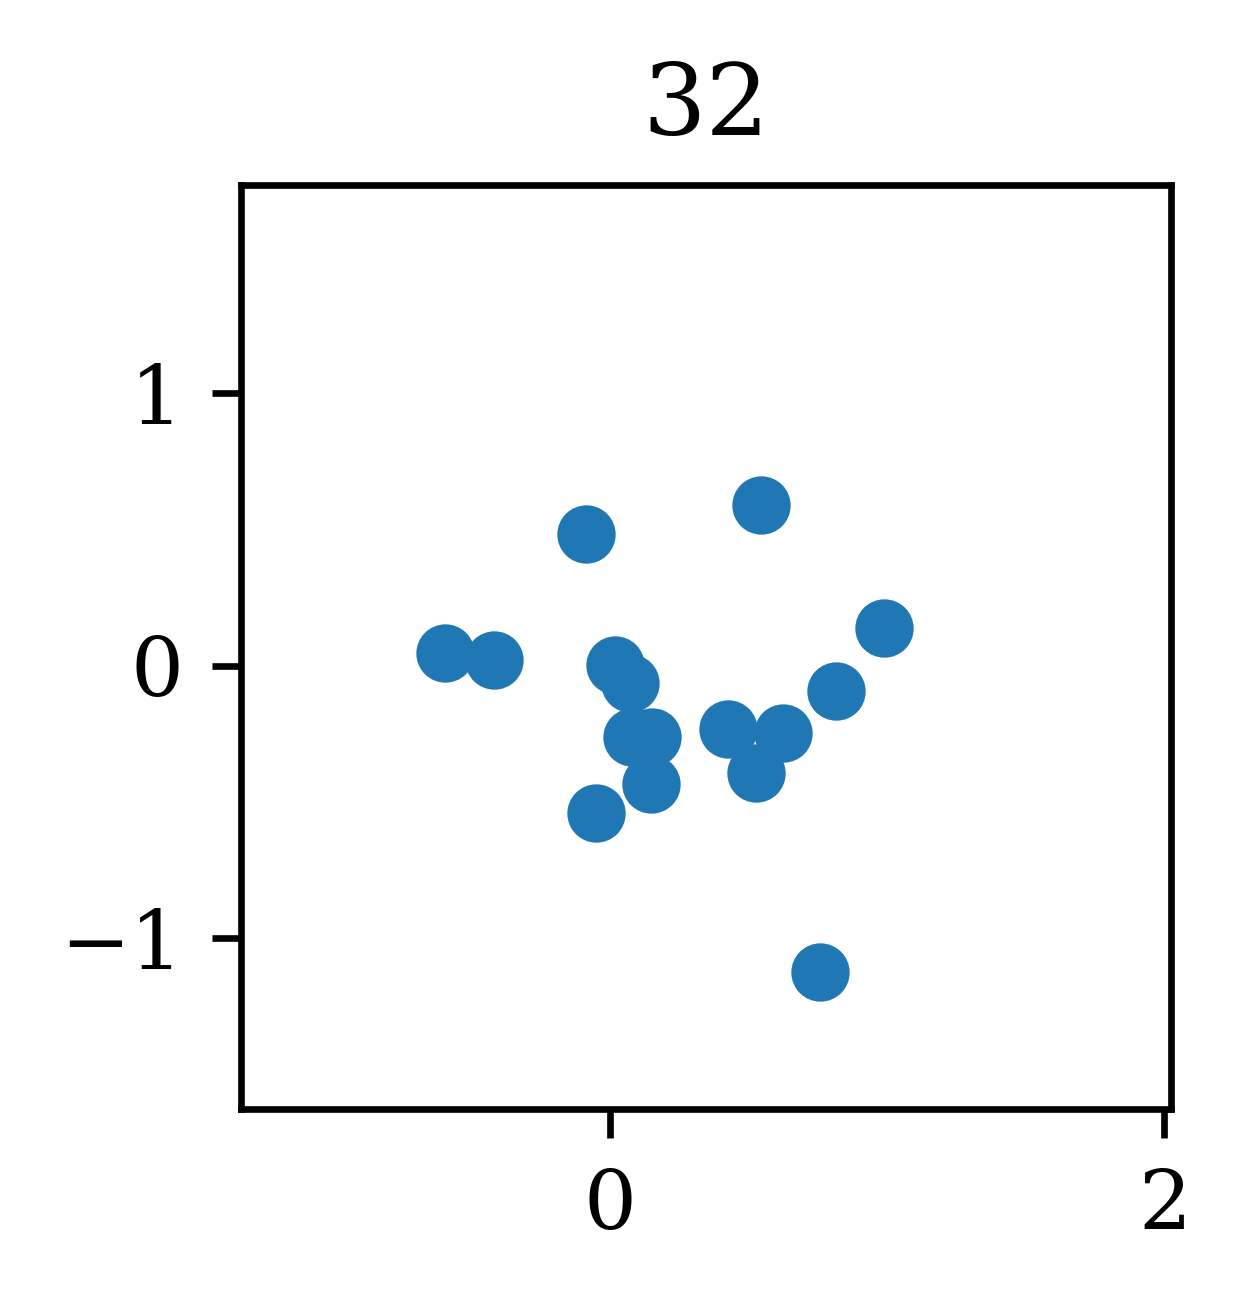

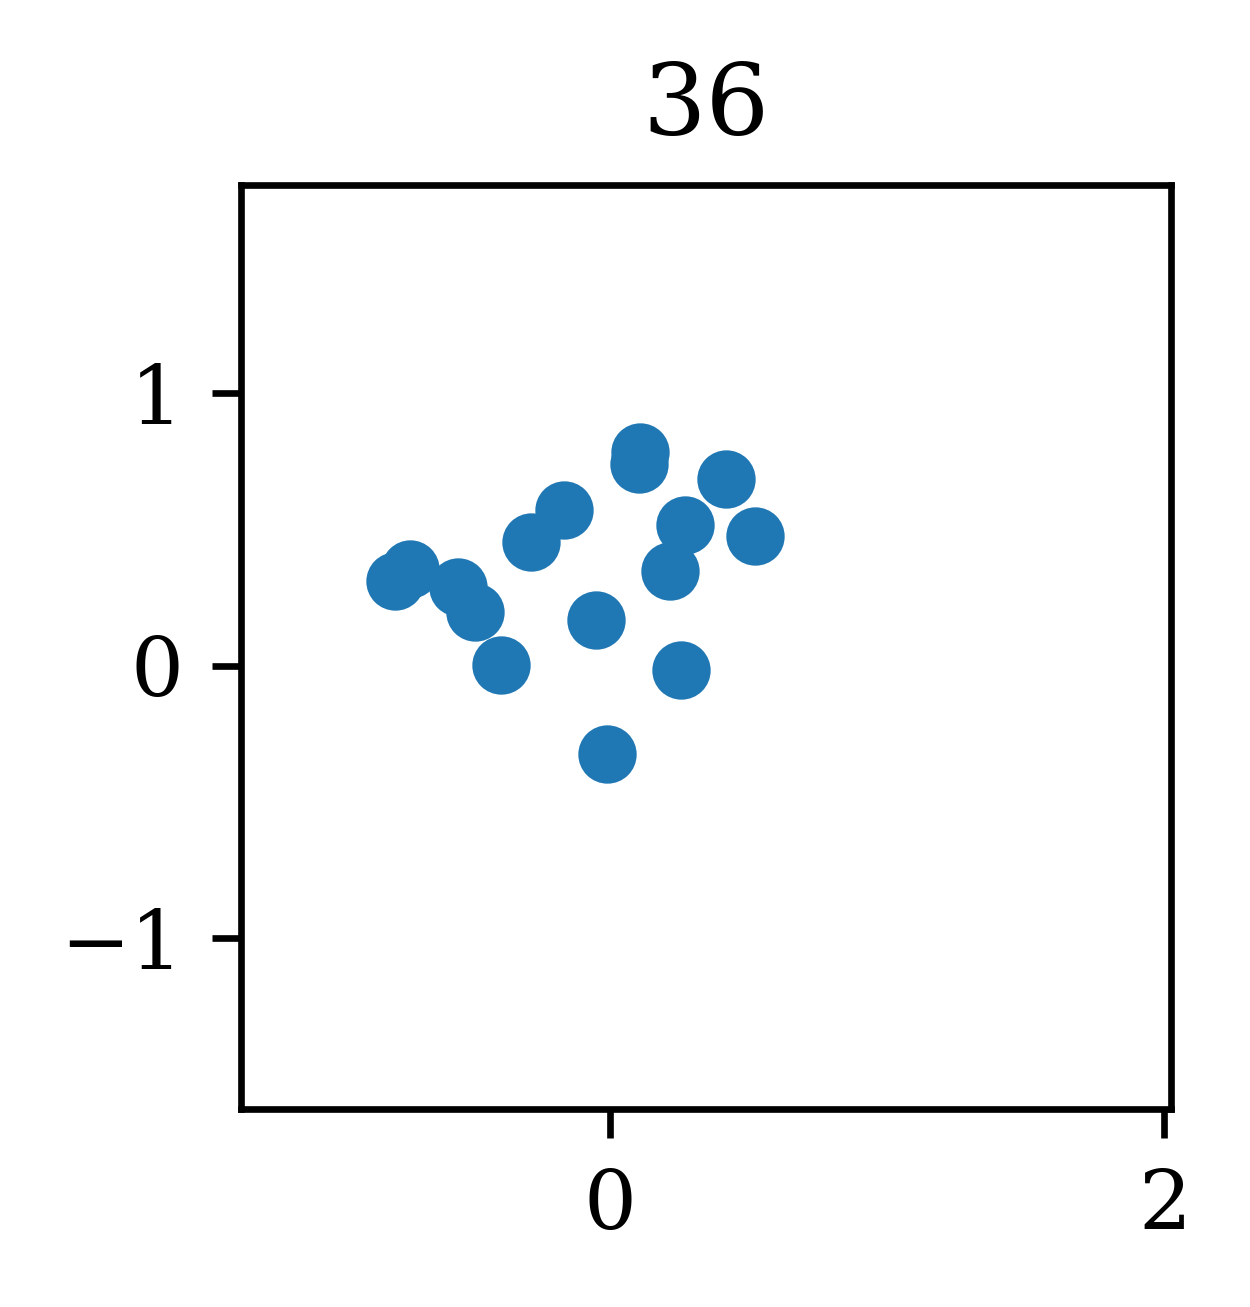

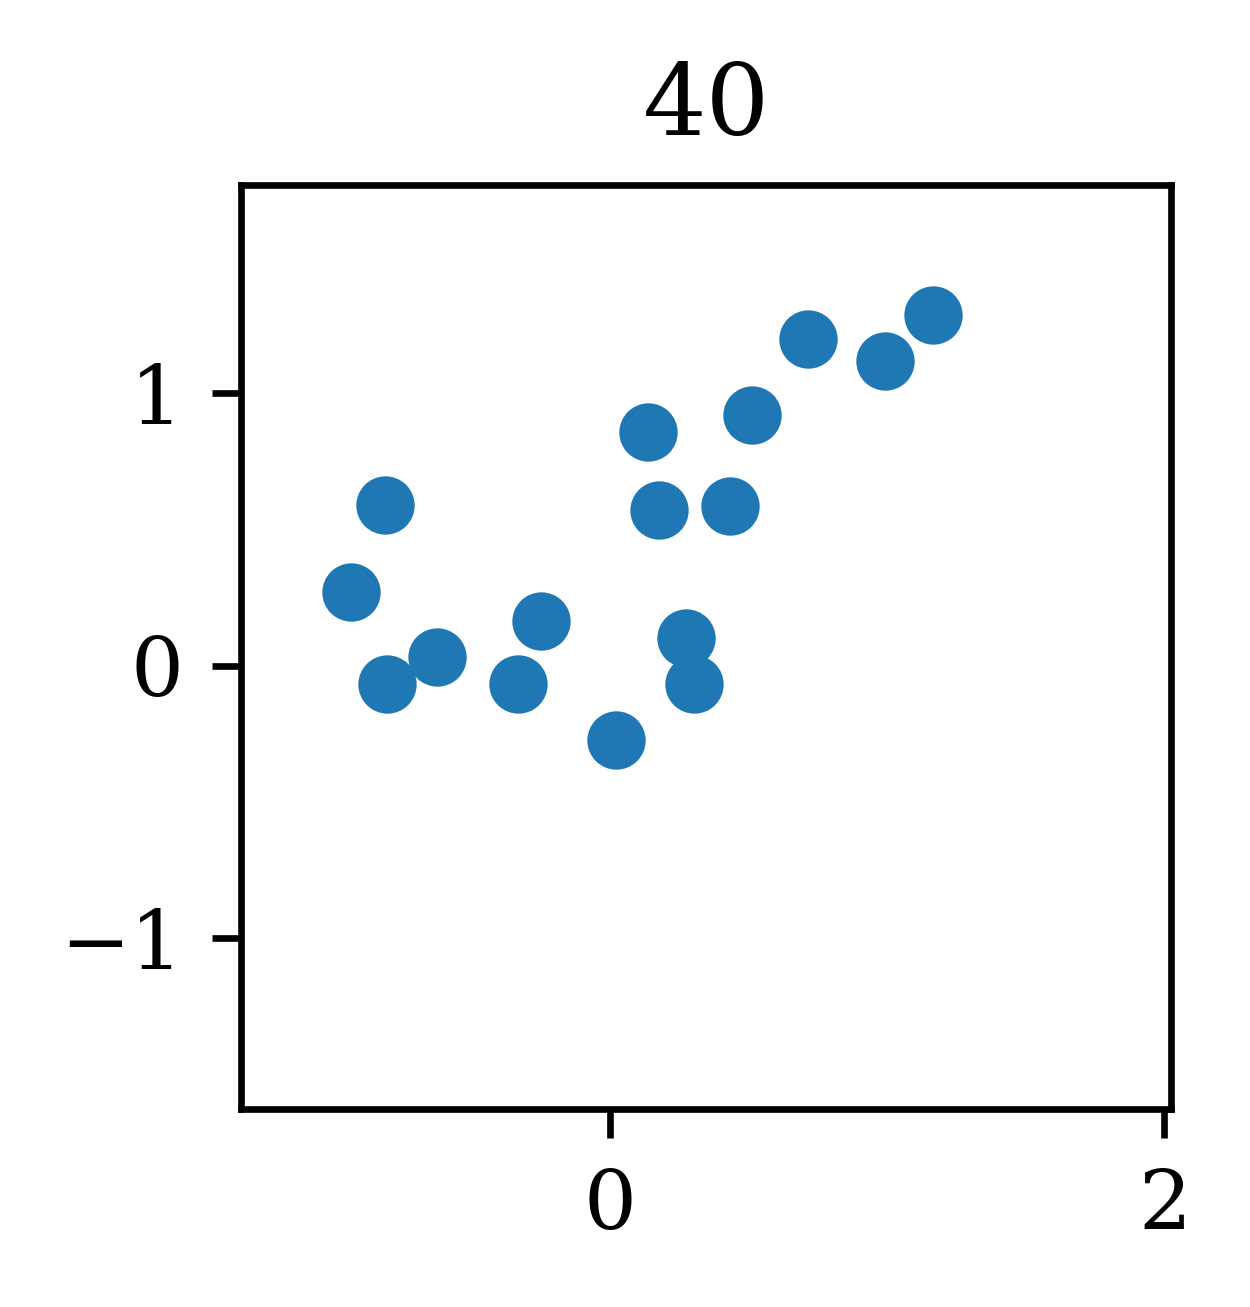

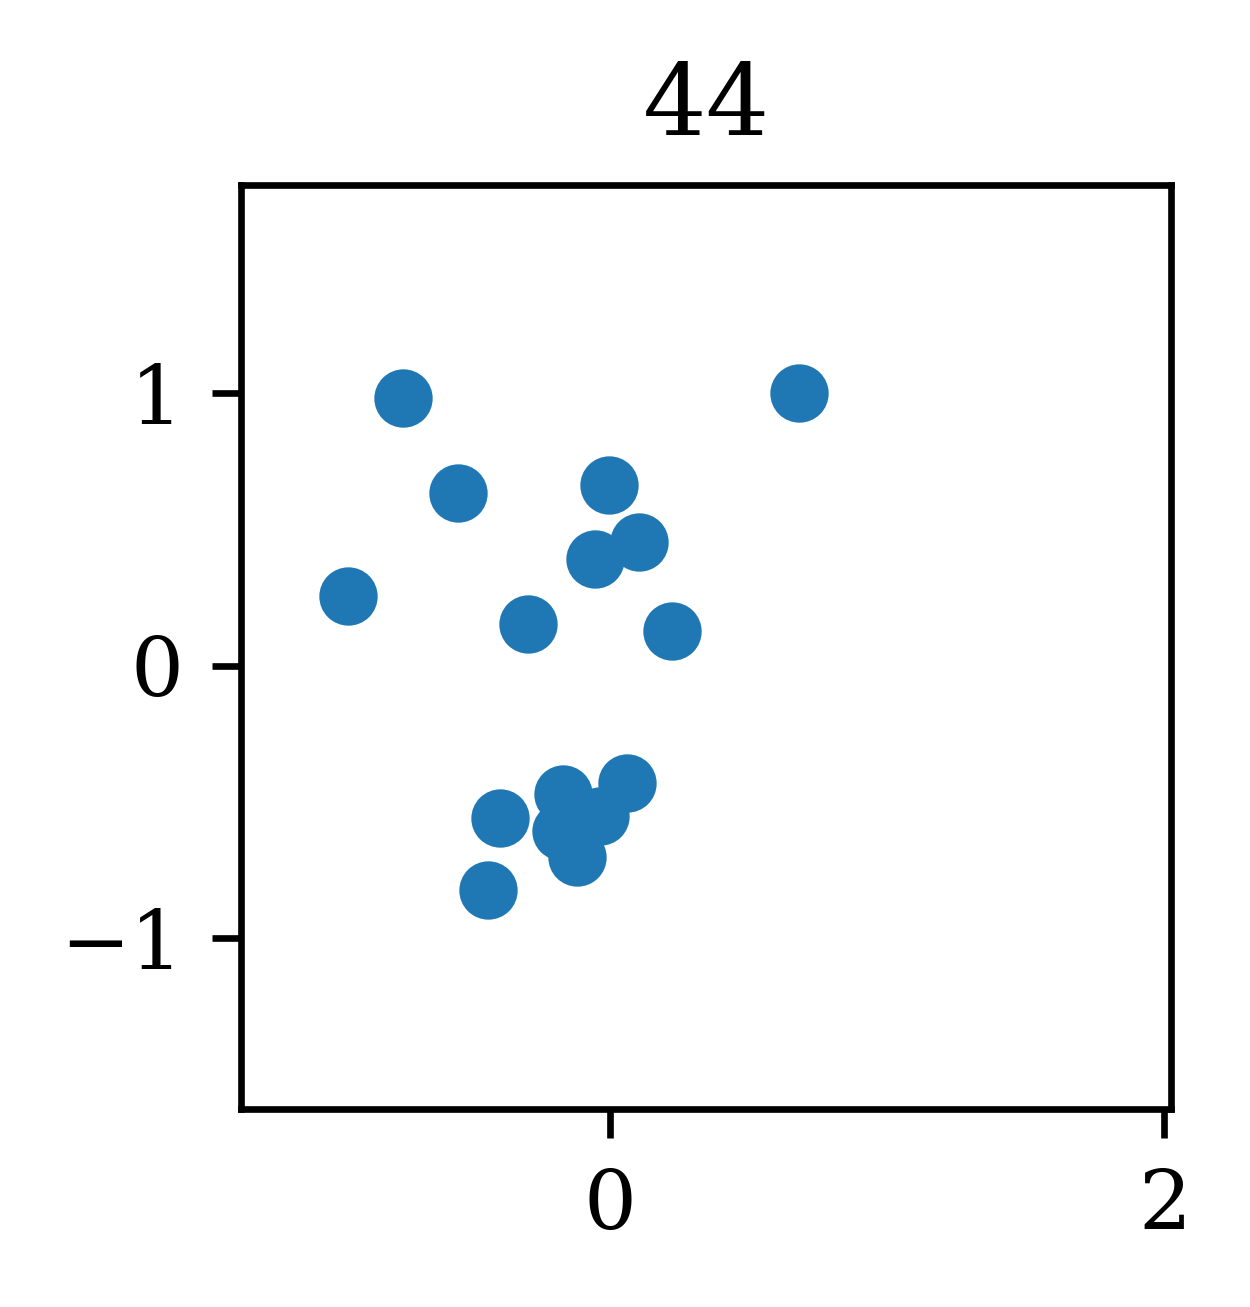

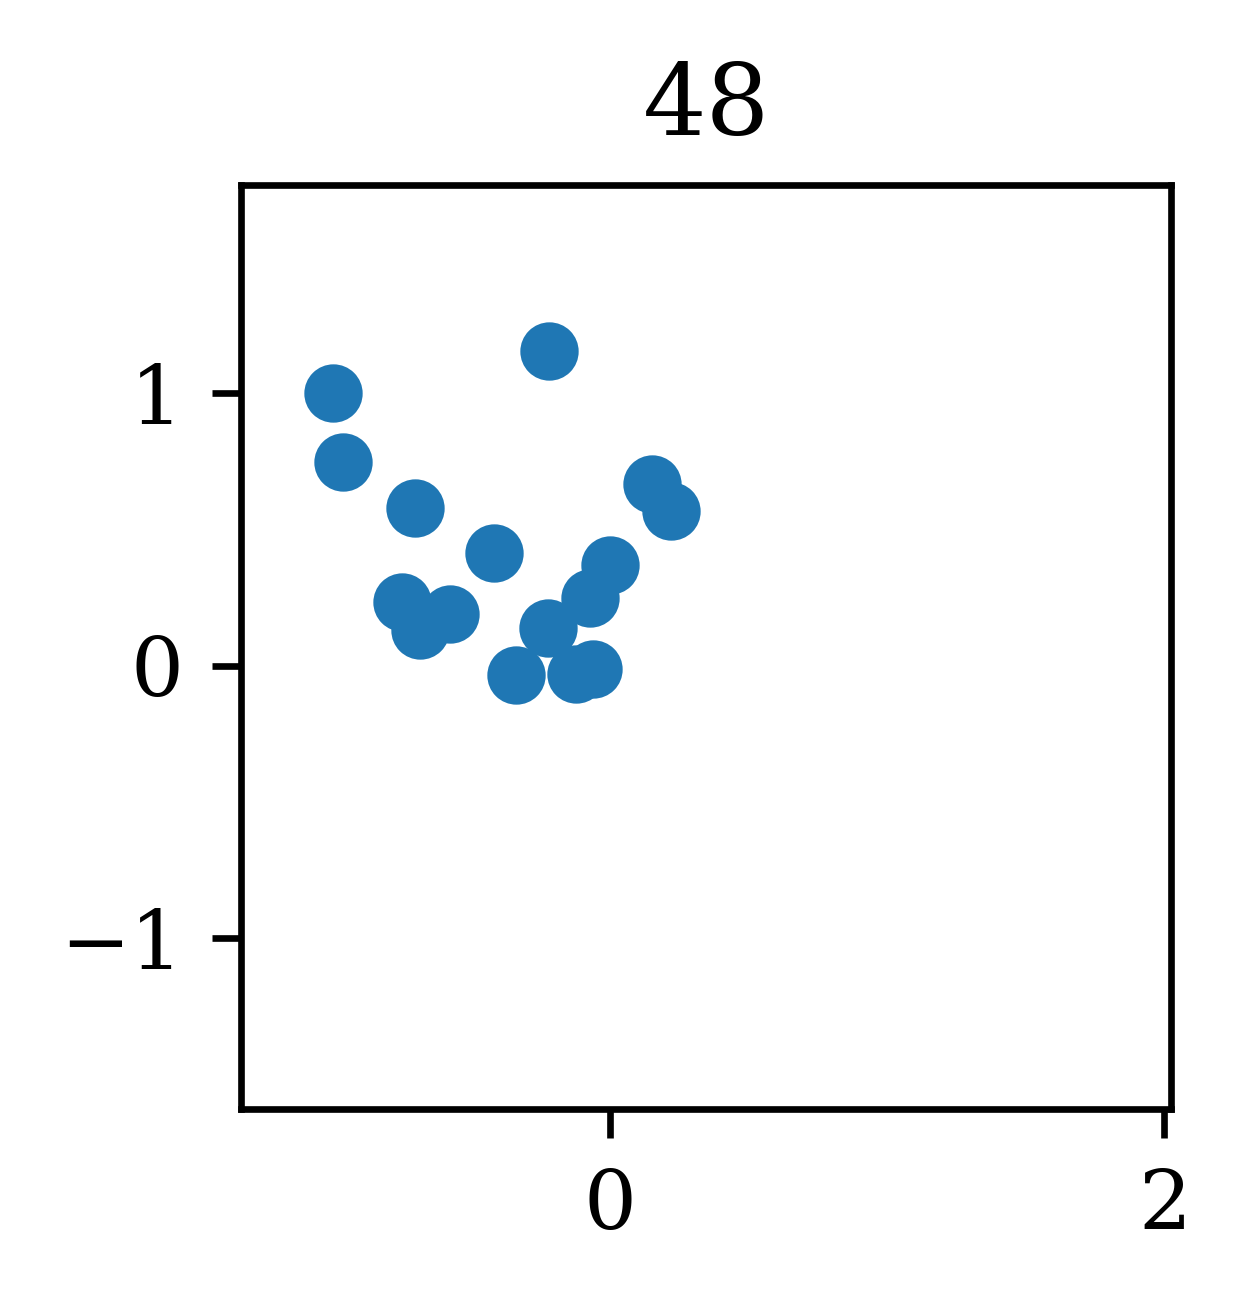

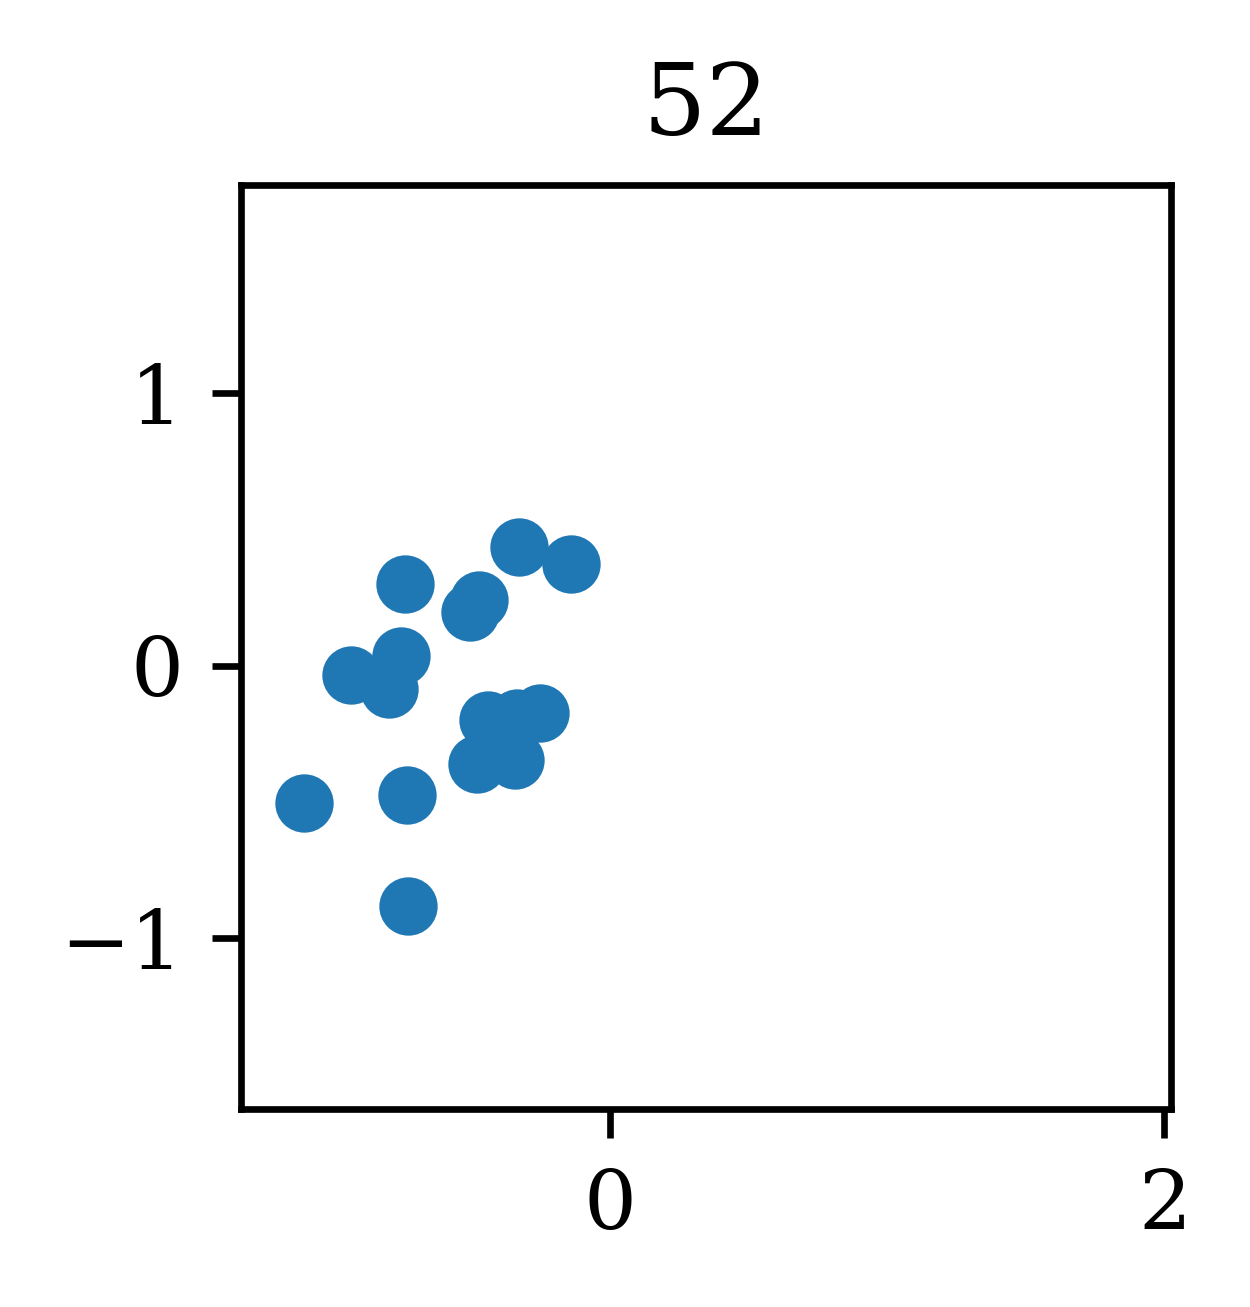

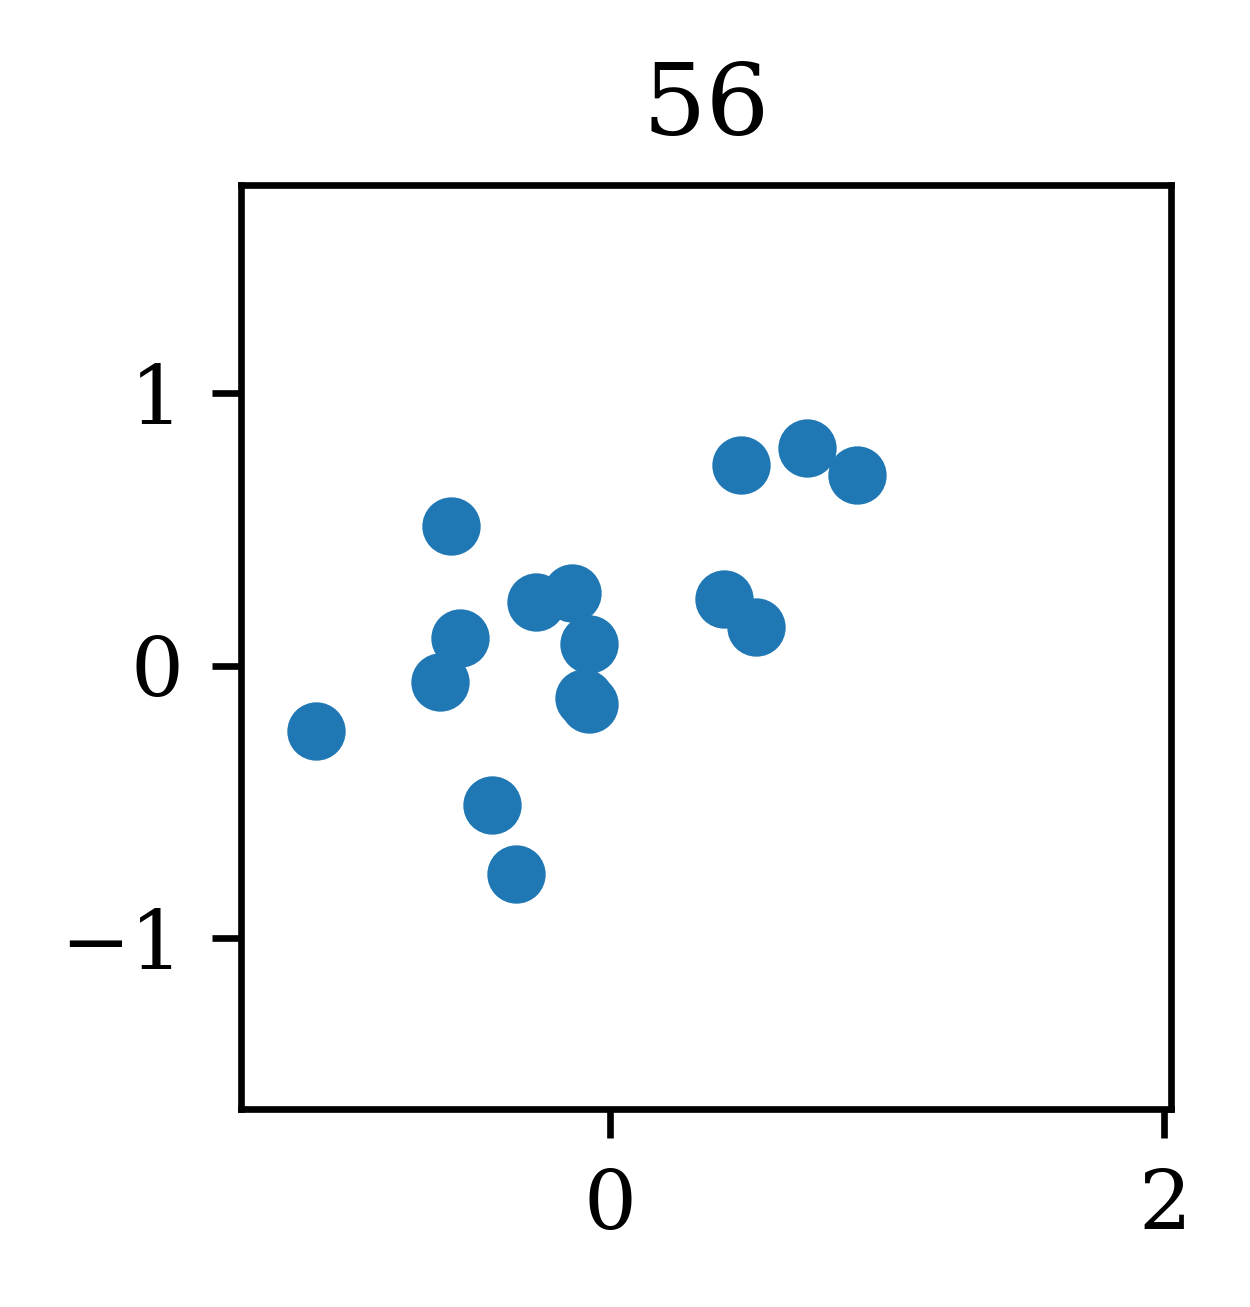

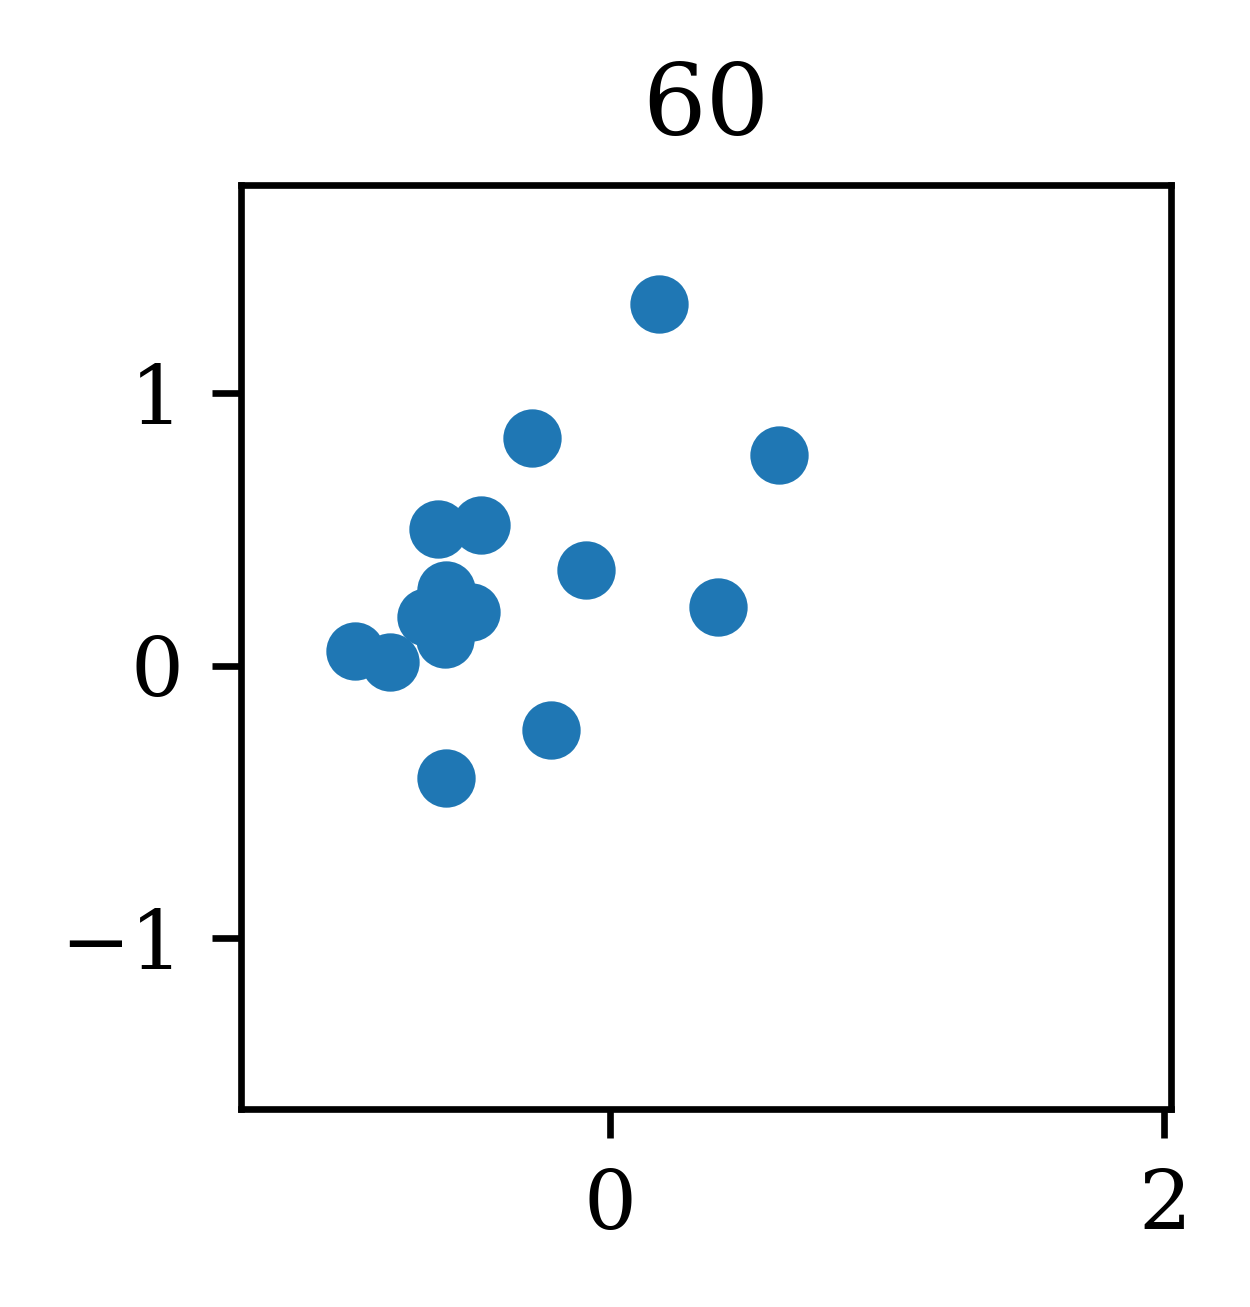

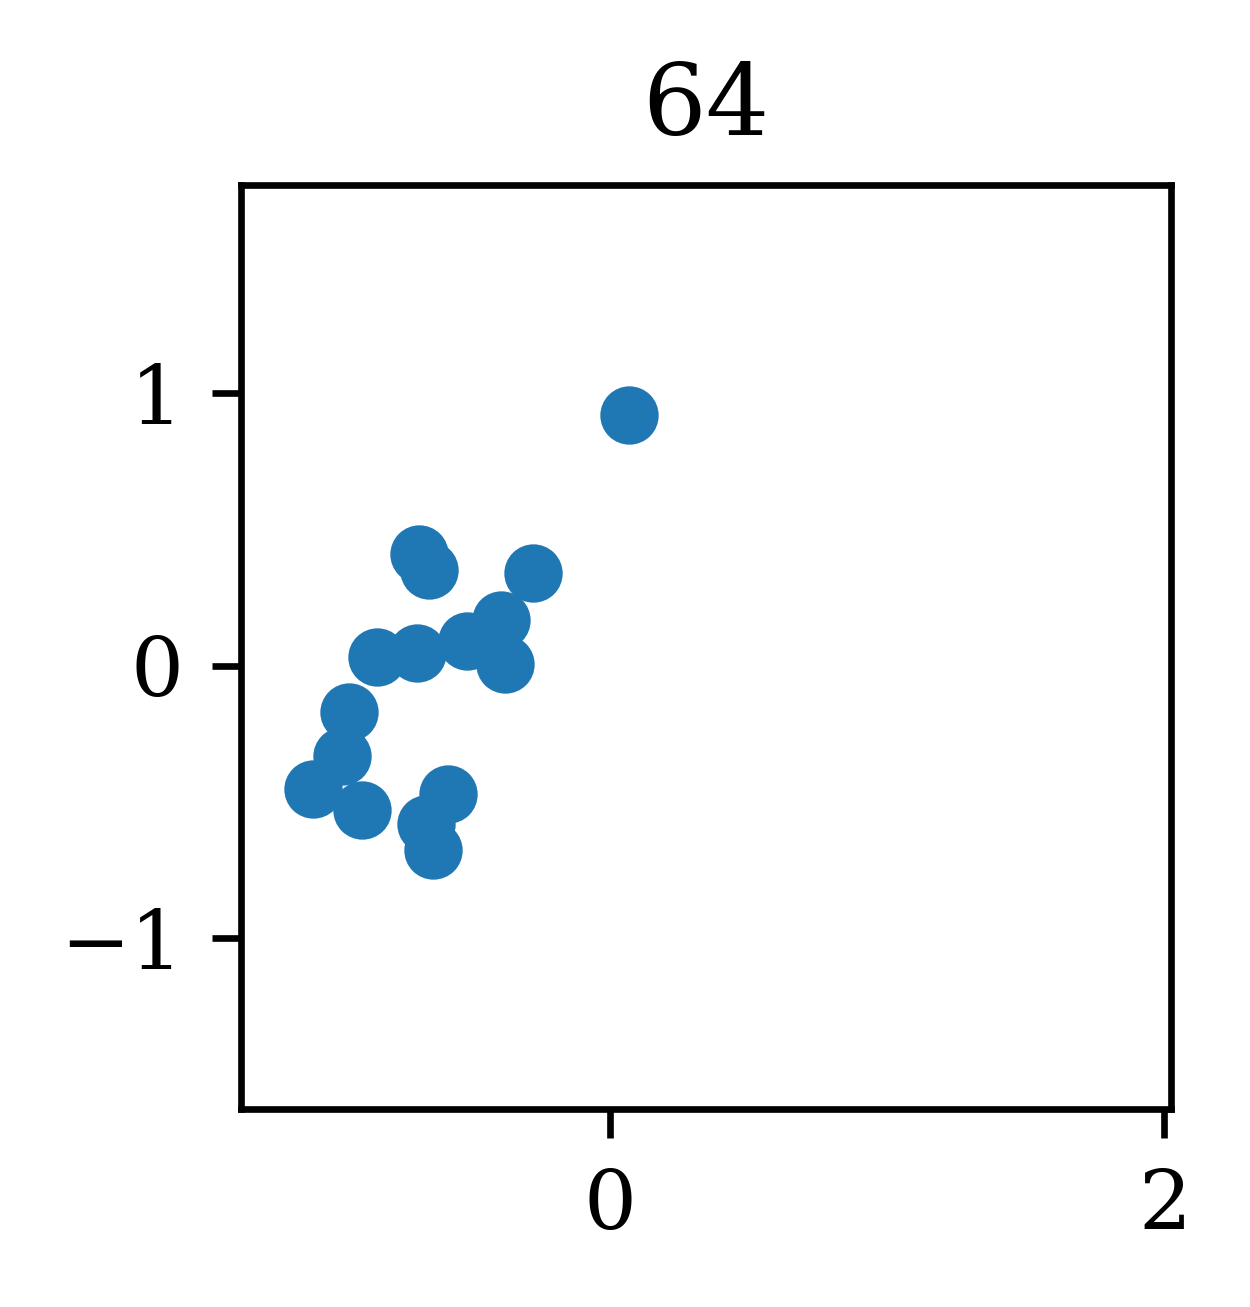

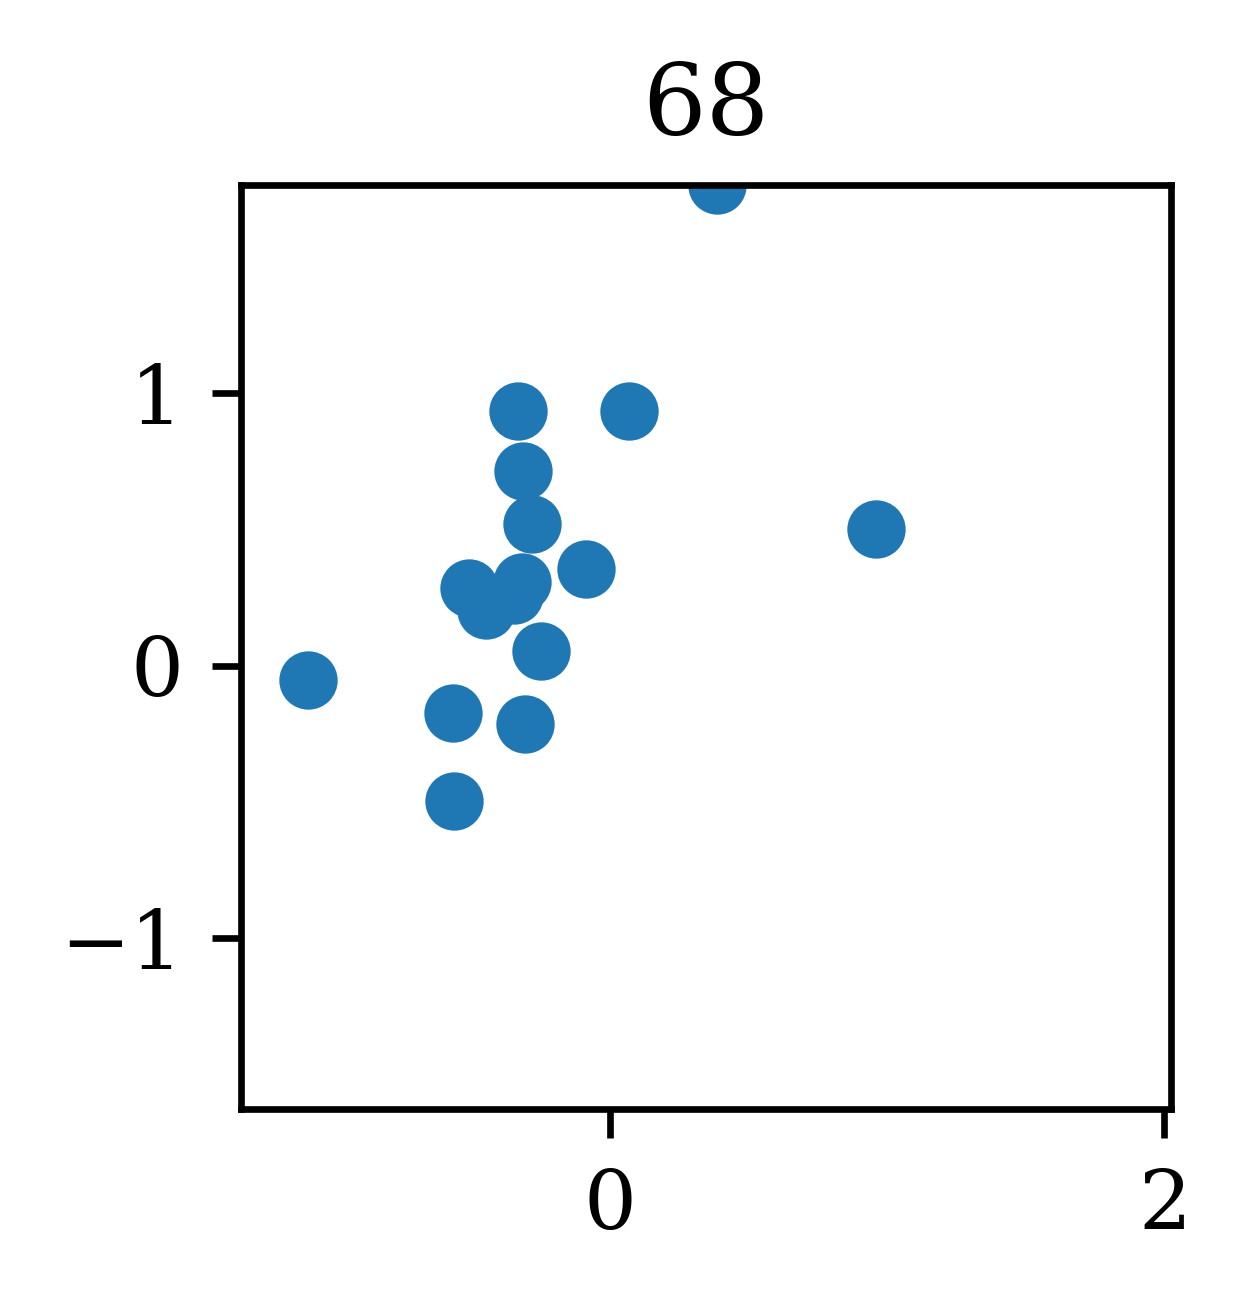

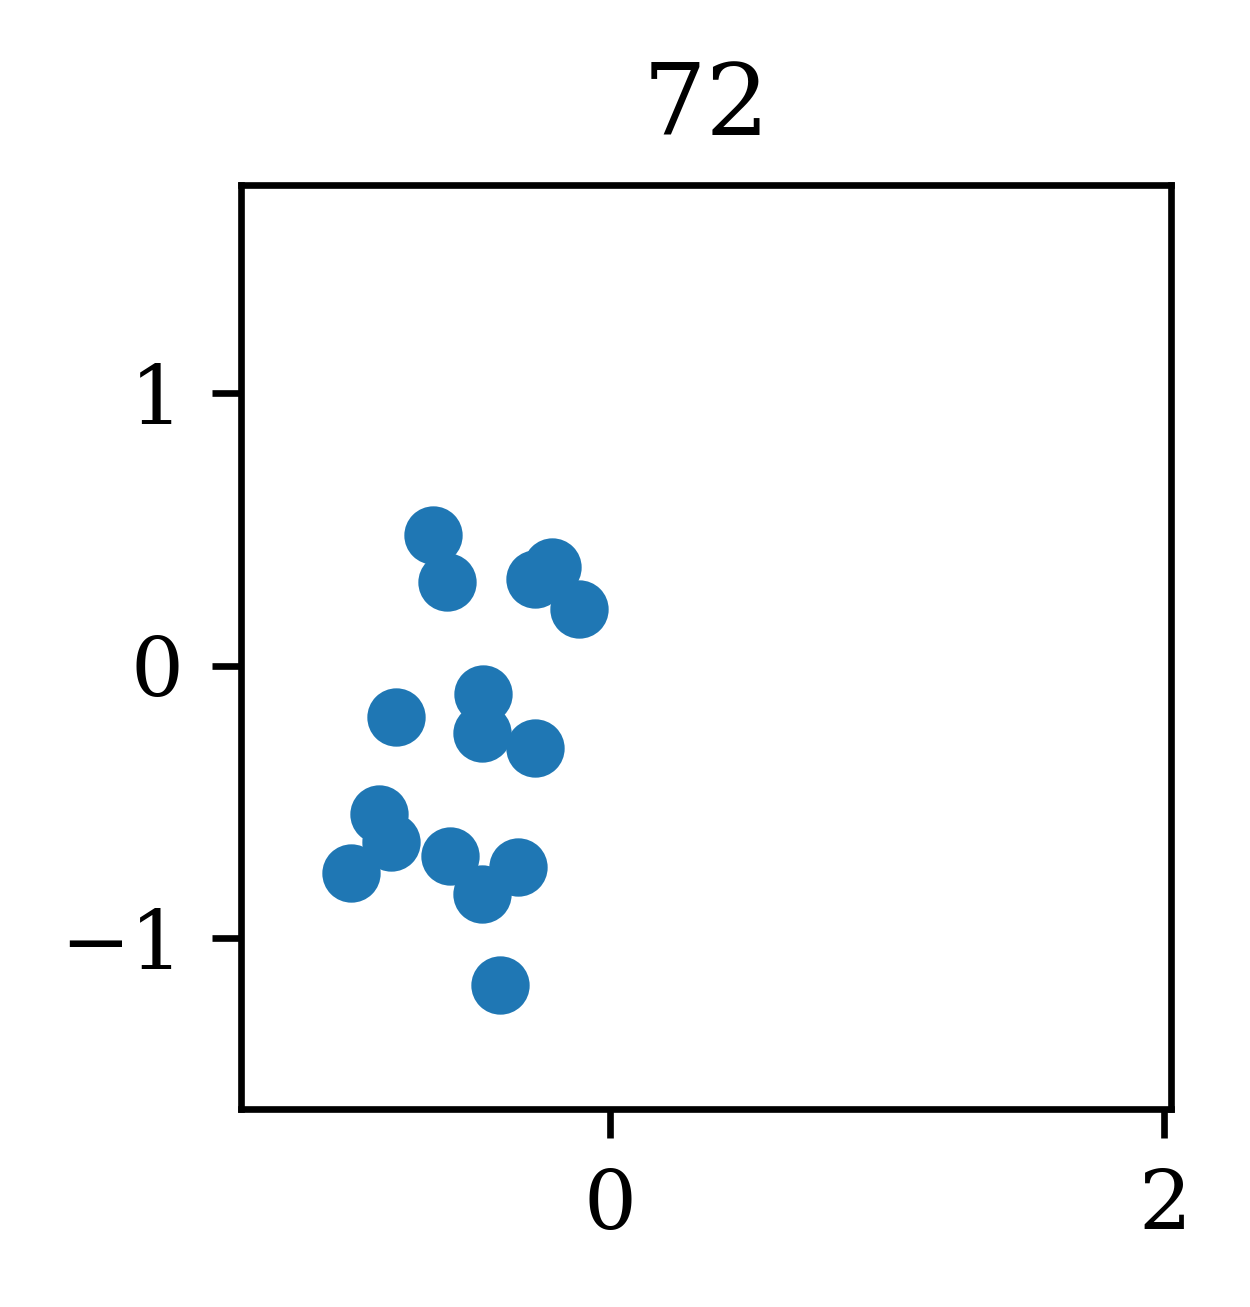

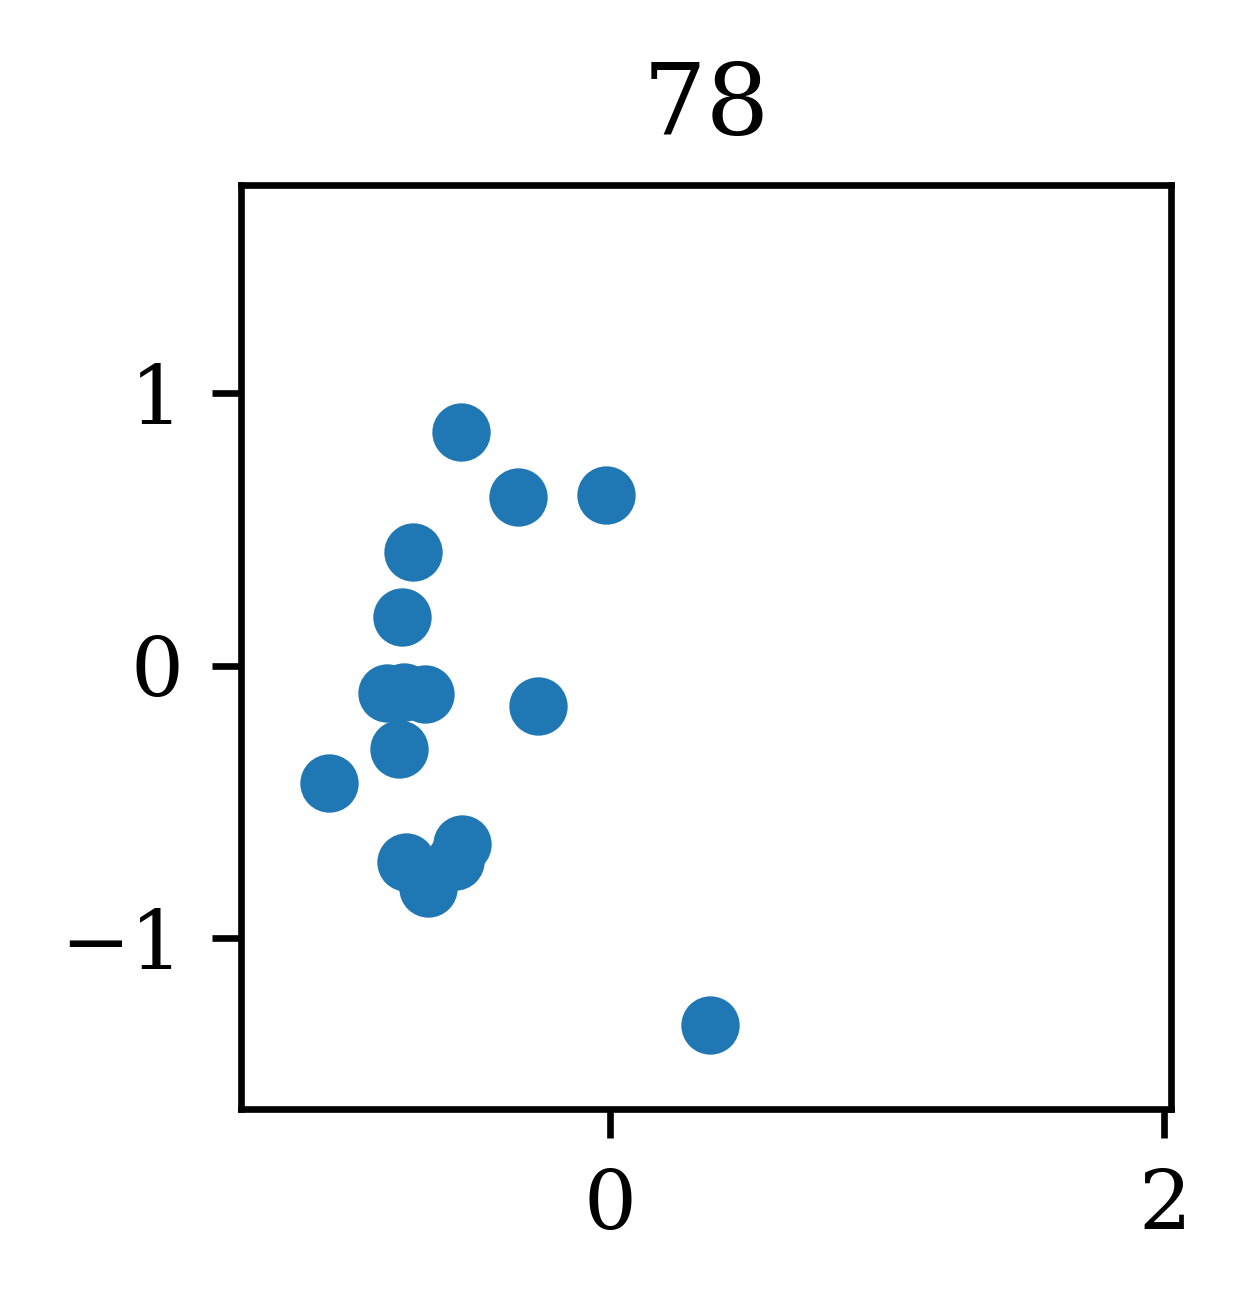

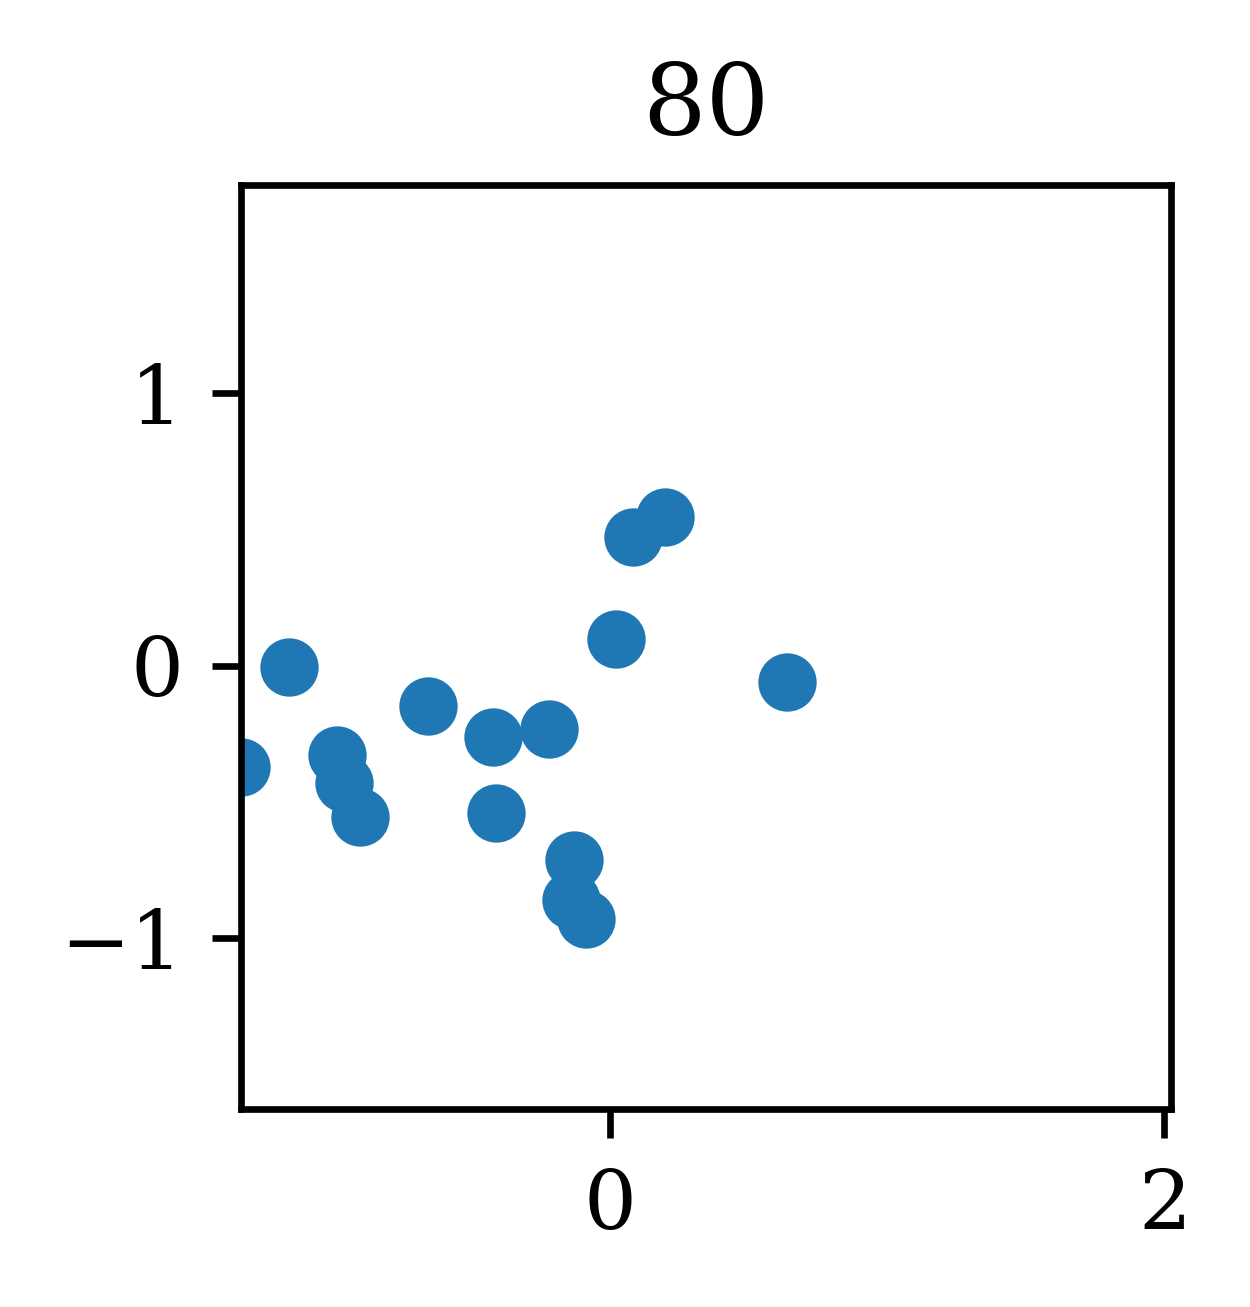

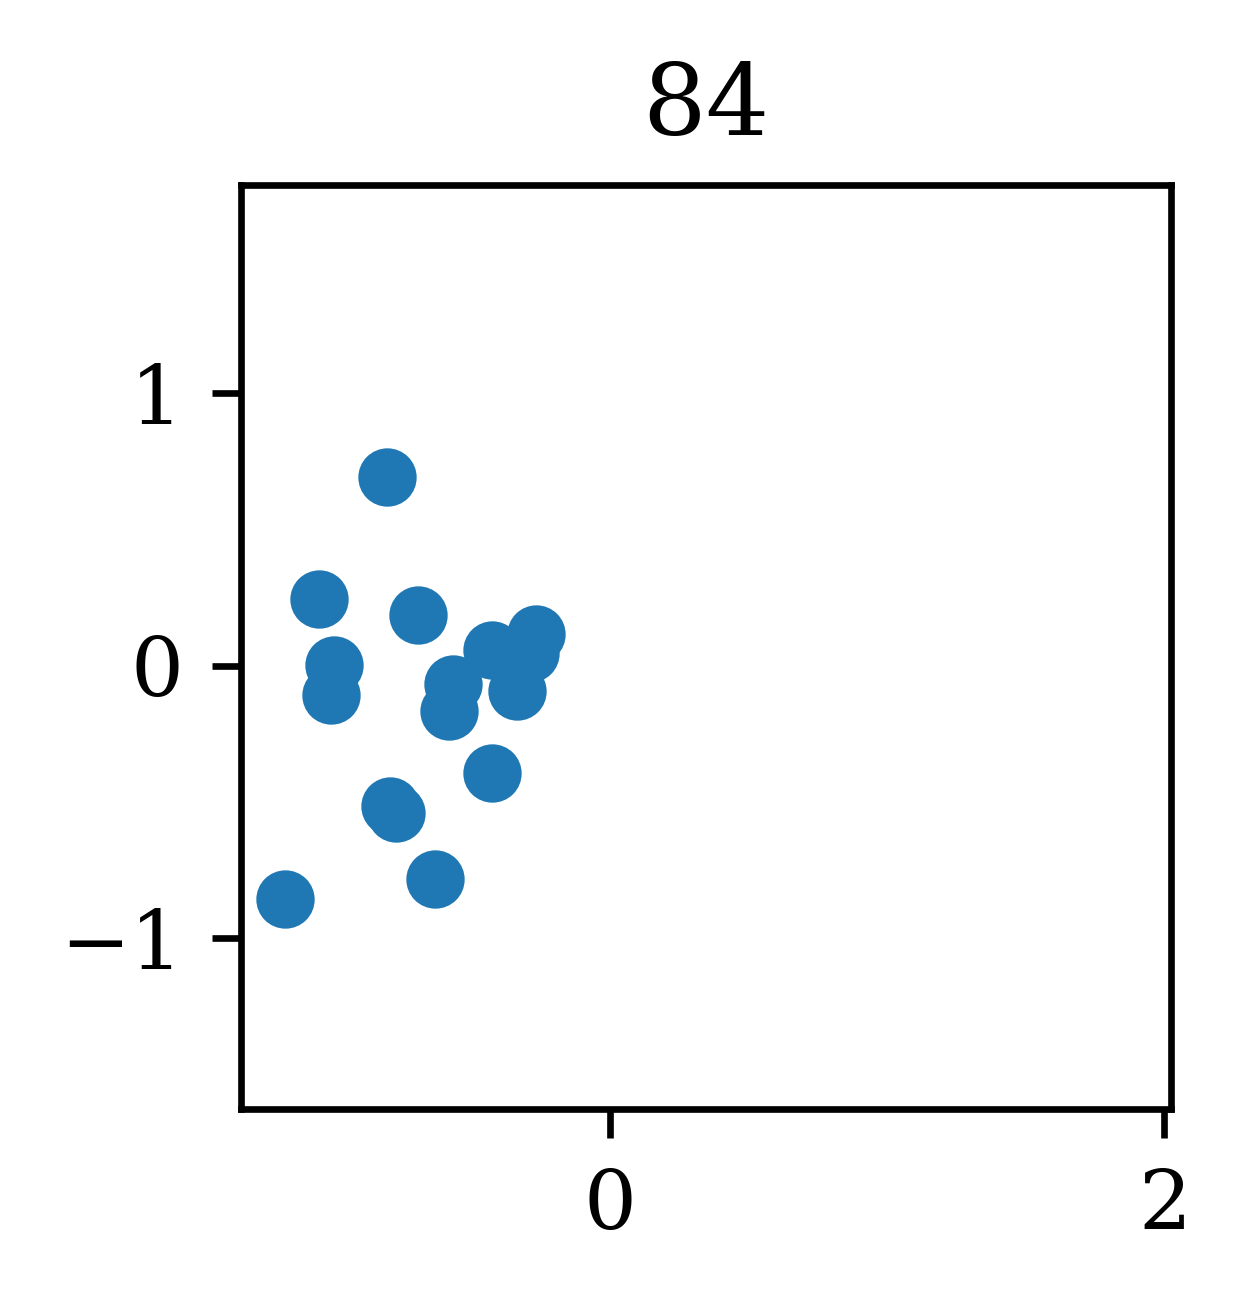

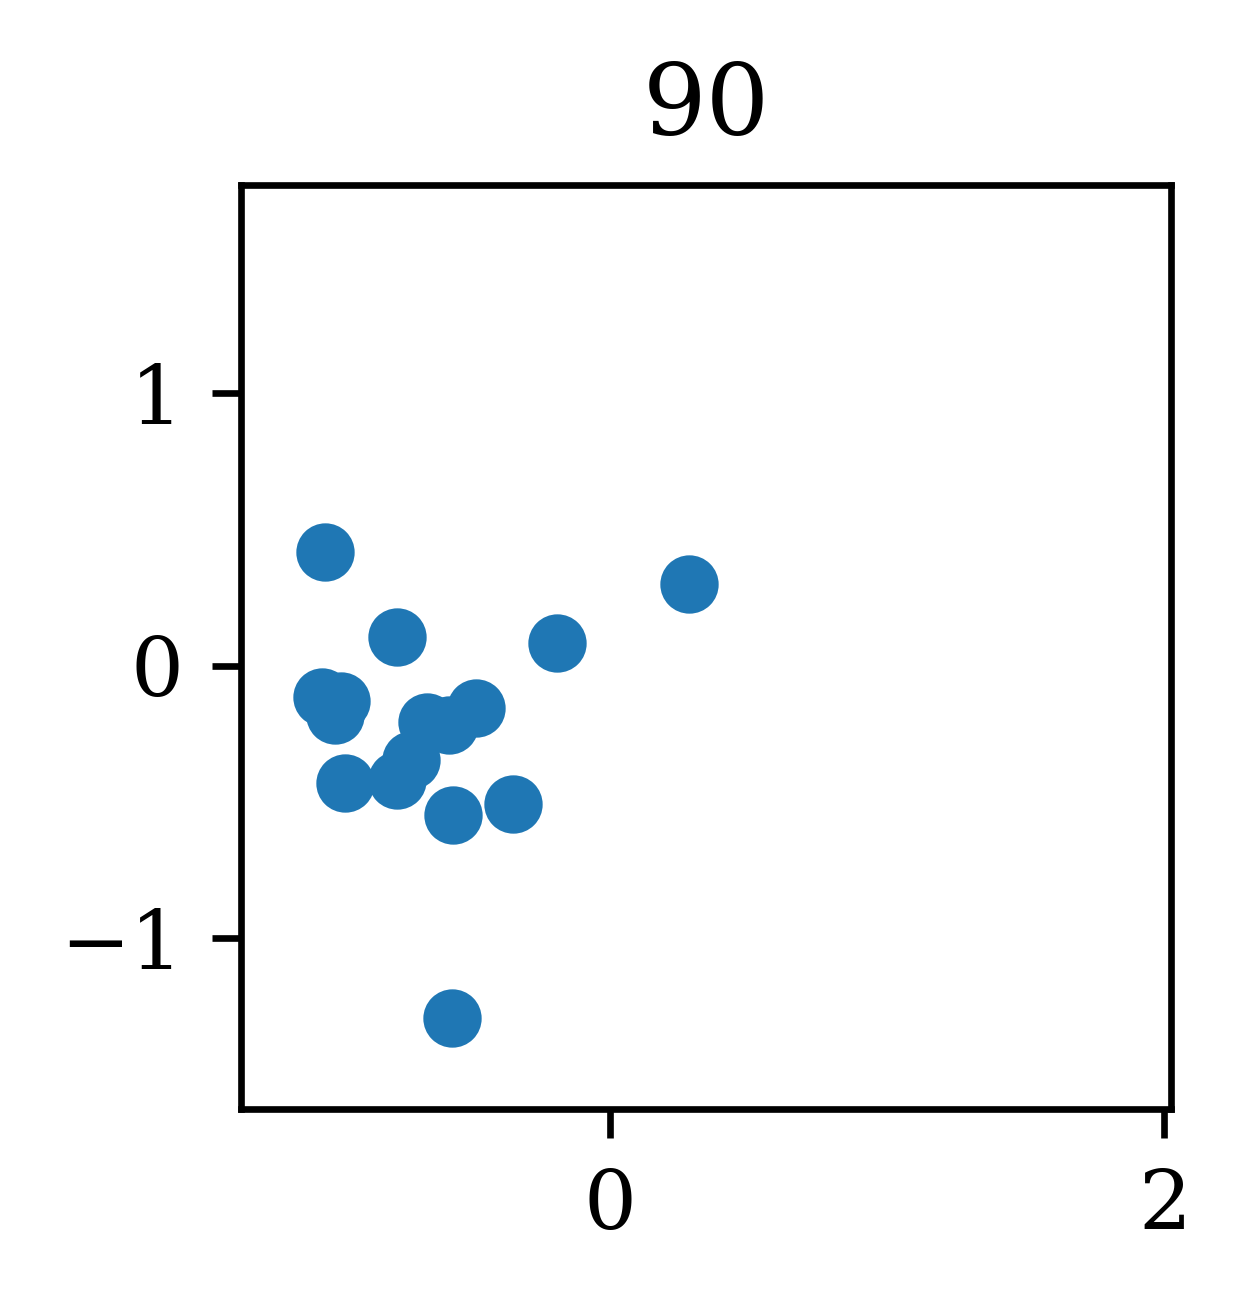

In [180]:
# for age, _df in pc_df.groupby(age_cuts):
for age, _df in pc_df.groupby('age'):
    figure(2, 2)
    plt.scatter(_df[0], _df[1])
    plt.xlim(pc_df[0].min(), pc_df[0].max())
    plt.ylim(pc_df[1].min(), pc_df[1].max())
    plt.title(age)

In [183]:
dets = {}
for age, _df in pc_df.groupby(age_cuts):
# for age, _df in pc_df.groupby('age'):
    x = np.cov((_df - _df.mean()).T)
    dets[age] = np.linalg.det(x)
    # if age == 28:
    #     break

<Axes: xlabel='age'>

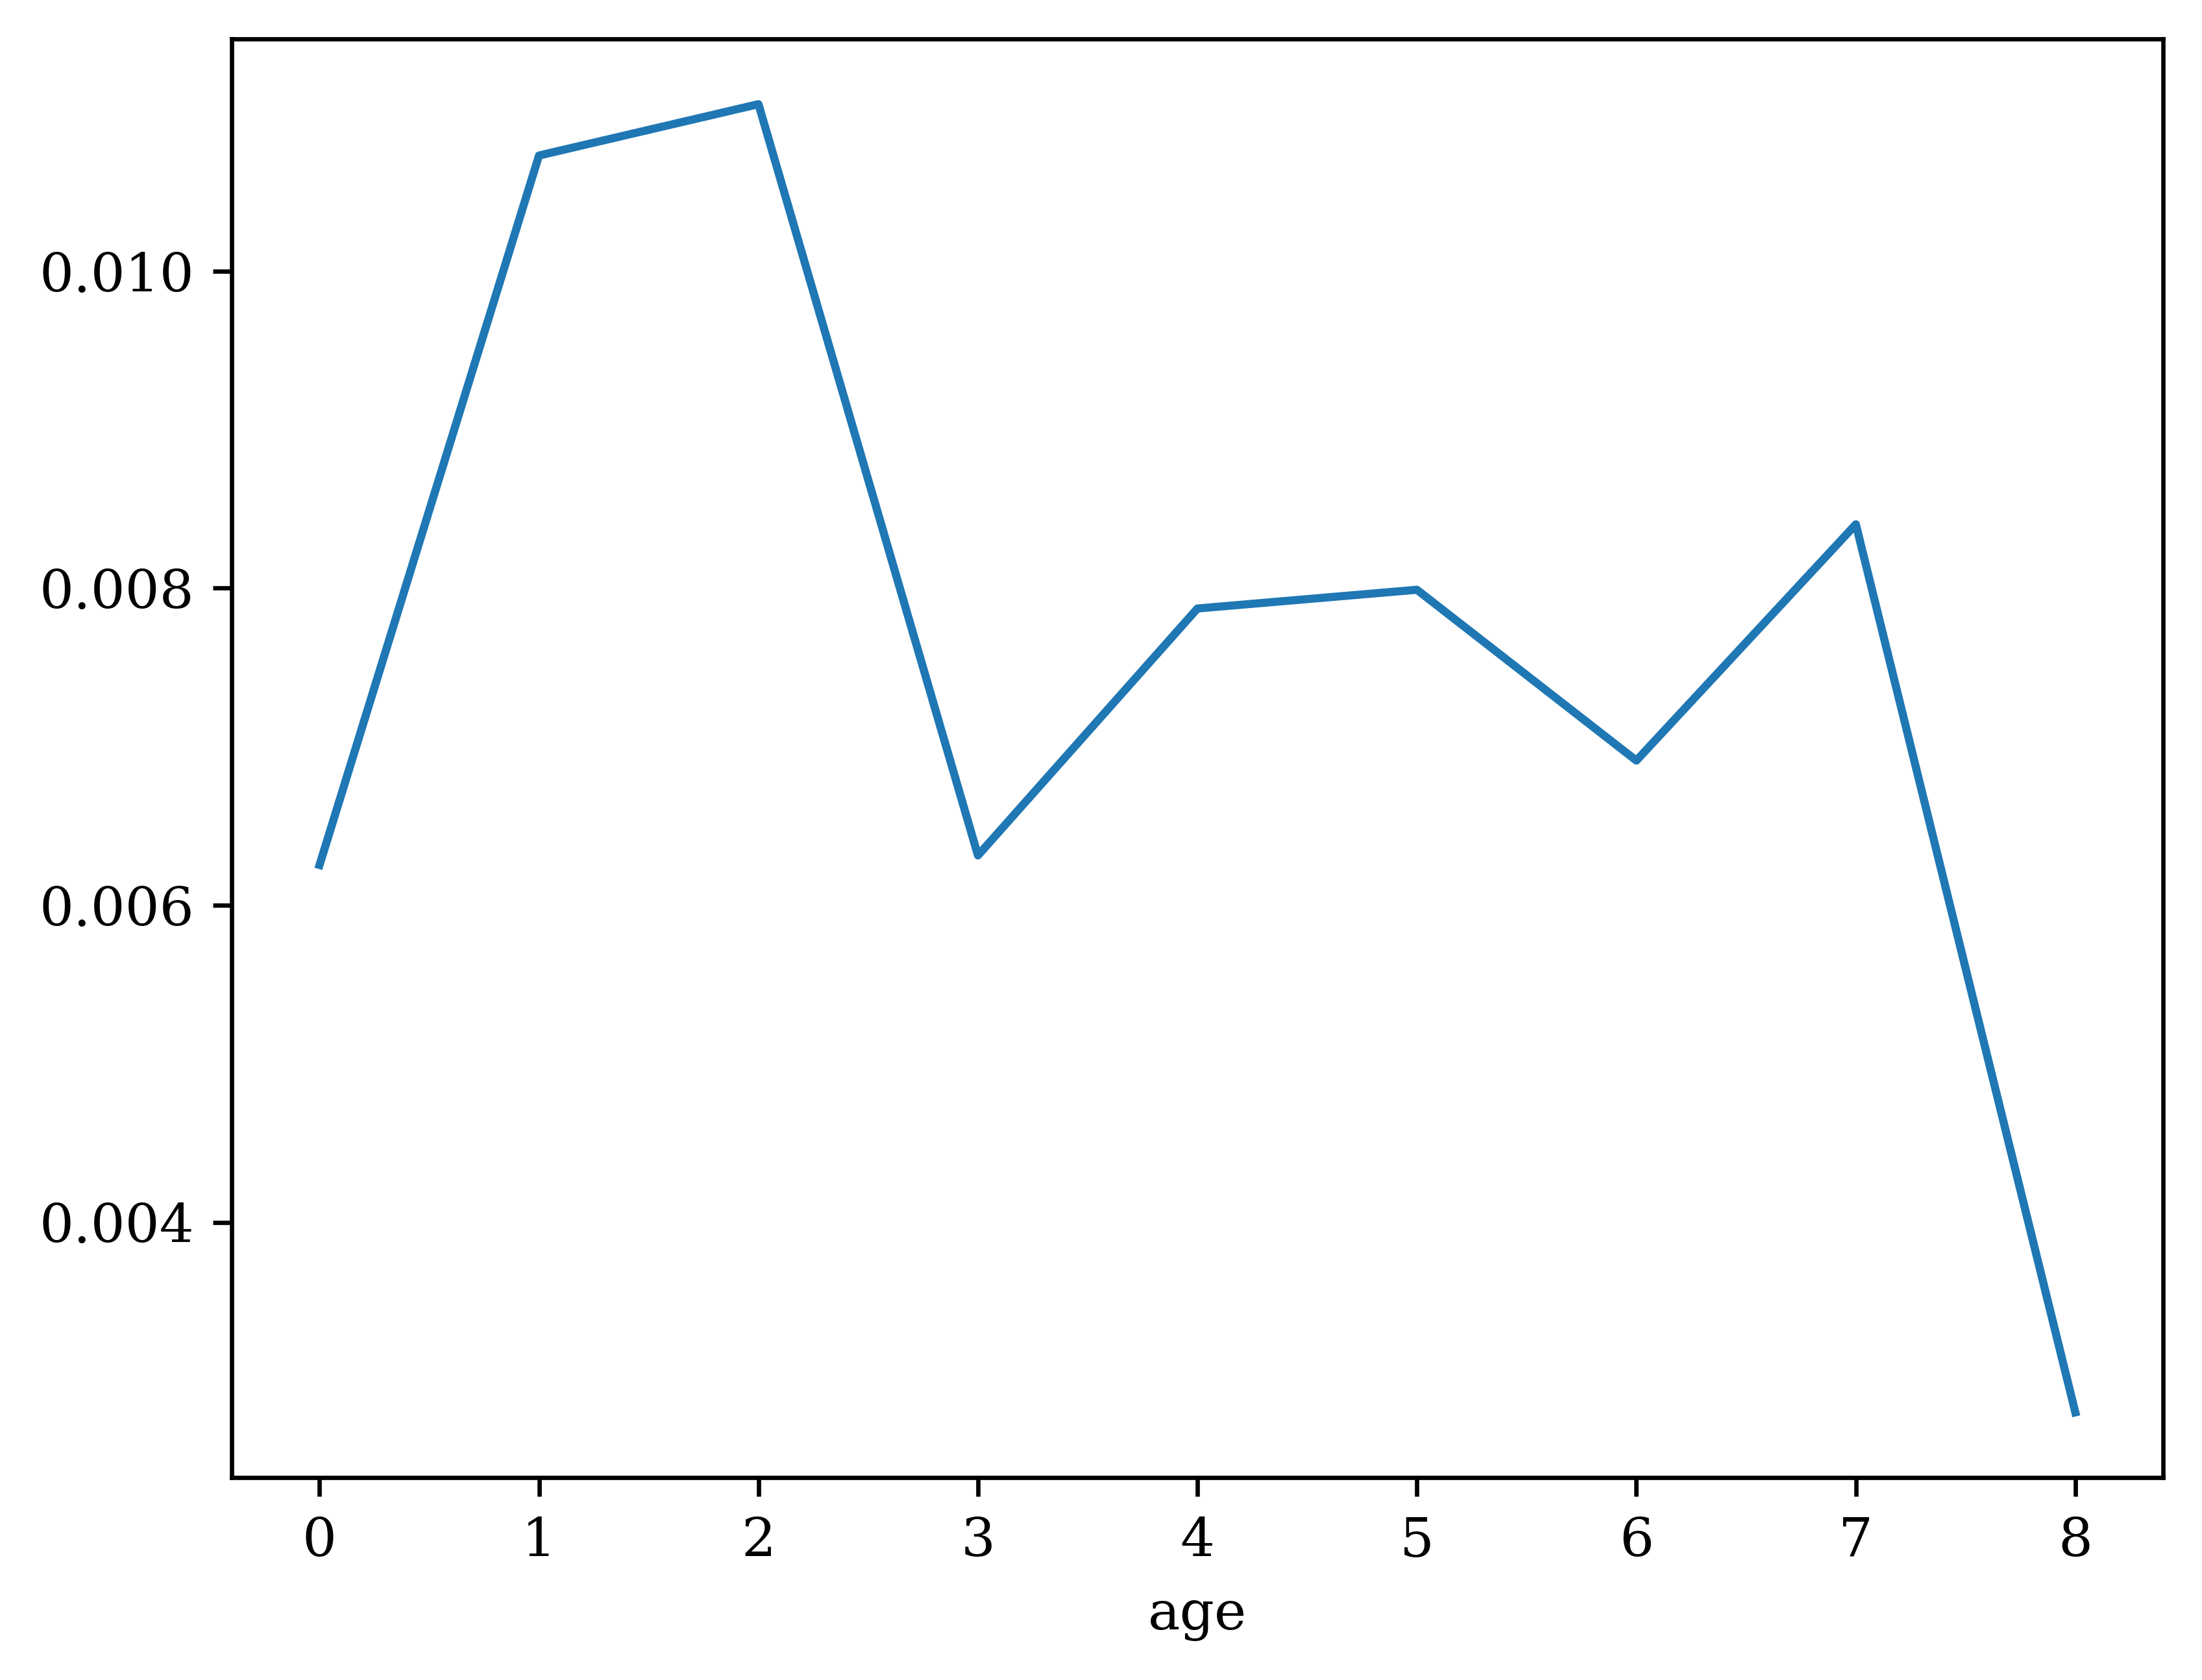

In [184]:
ser = pd.Series(dets, name="det")
ser.index.name = 'age'
# ser.rolling(5, center=True, min_periods=1).mean().plot()
ser.plot()

In [149]:
np.linalg.det(x)

6.877362745180907e-07

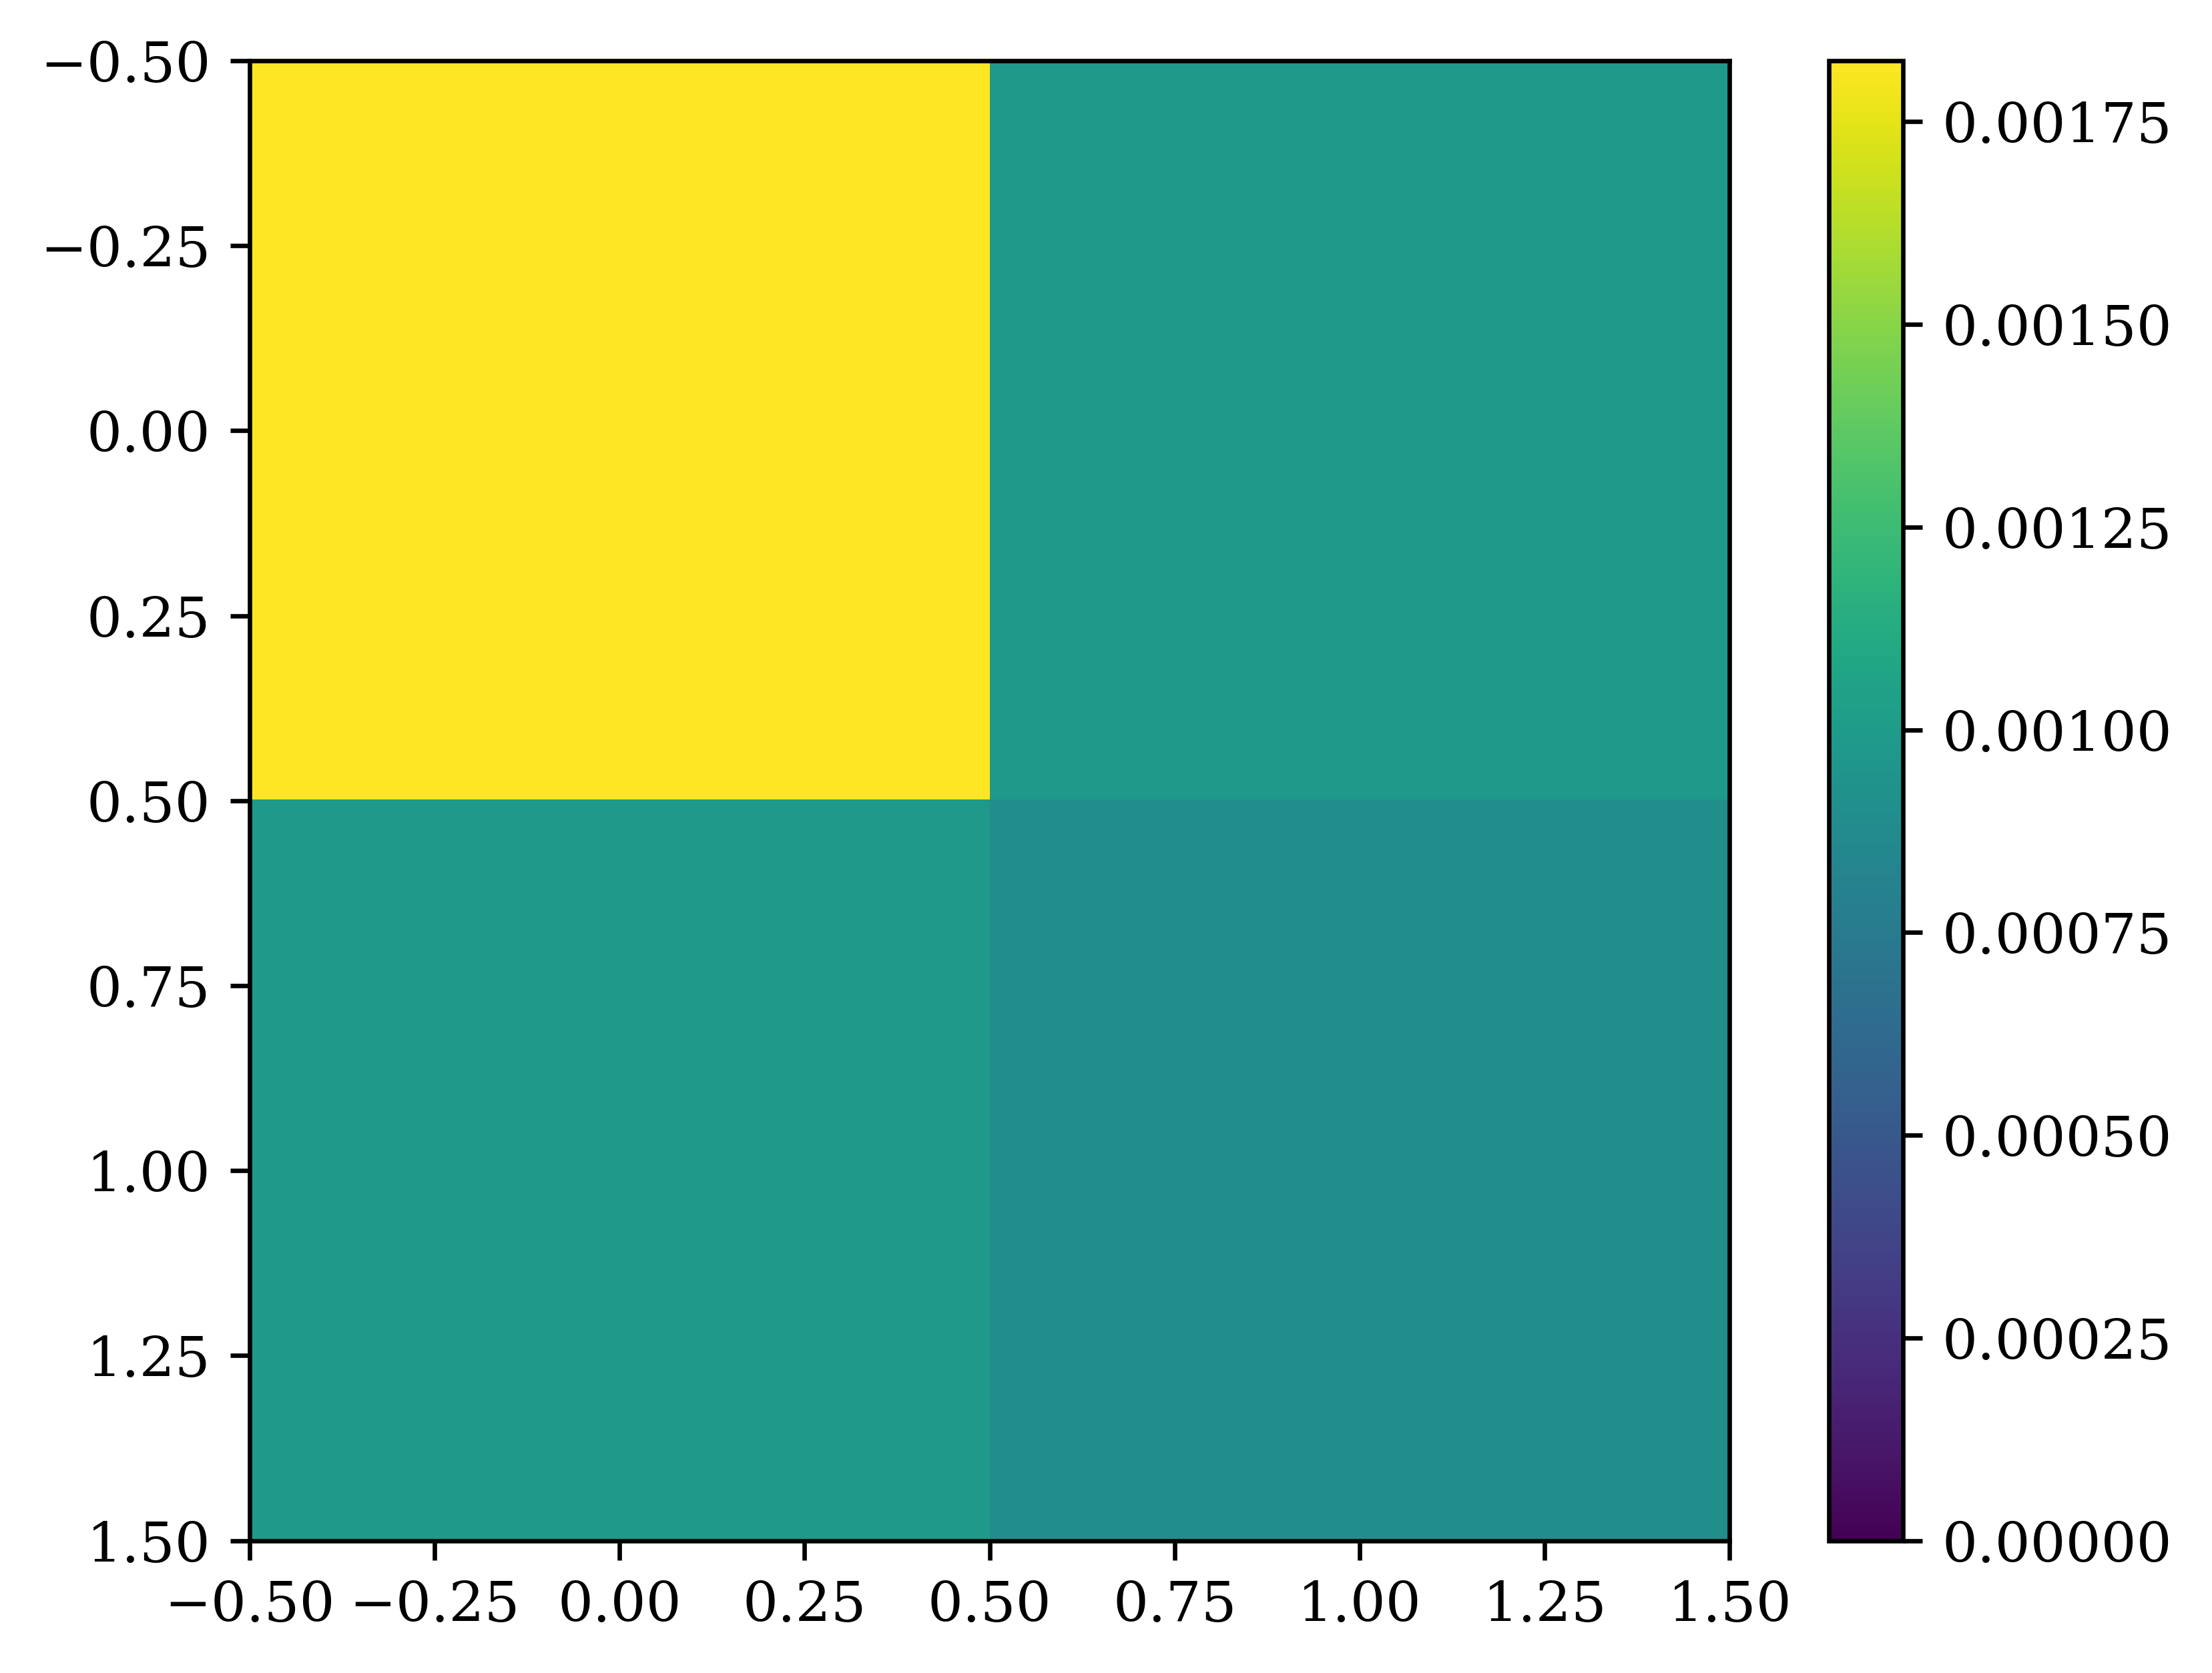

In [147]:
plt.imshow(x, vmin=0)
plt.colorbar()